# Predicting Hospital Stay Duration Using Patient and Admission Data: A Data-Driven Approach to Optimize Healthcare Resources

**Problem Statement**

Healthcare facilities face challenges in managing the unpredictability of patient lengths of stay, which impacts resource allocation, staffing, and overall operational efficiency. The goal of this project is to develop a predictive model that accurately estimates hospital stay duration based on patient and admission data. By leveraging machine learning, we aim to provide actionable insights that enable hospitals to optimize resources, improve patient care, and enhance operational planning. This solution seeks to address a critical need in healthcare systems for effectively managing patient flow and ensuring timely and effective patient outcomes.

**Data Dictionary**

Available Extra Rooms in Hospital: Number of extra rooms available in the hospital at the time of admission.

Department: The hospital department where the patient was admitted.

Ward_Facility_Code: Code of the ward where the patient was admitted.

doctor_name: Name of the attending doctor during admission.

staff_available: Number of medical staff available at the time of admission.

patient_id: Unique identifier for each patient.

Age: Age of the patient.

gender: Gender of the patient.

Type of Admission: Type of patient admission.

Severity of Illness: Severity level of the patient's condition at the time of admission.

health_conditions: Number of existing health conditions the patient has.

Visitors with Patient: Number of visitors accompanying the patient during the hospital stay.

Insurance: Whether the patient has insurance coverage (Yes/No).

Admission_Deposit: Initial deposit amount paid at the time of admission (in currency).

Stay (in days): Duration of the patient's hospital stay. (Target Variable)

## Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
plt.rcParams['figure.figsize'] = [15,8]

In [9]:
import pylab
from scipy.stats import stats
from scipy.stats import probplot

In [10]:
from scipy import stats as st
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import *
import math

from sklearn.model_selection import GridSearchCV

## Load the CSV files

In [12]:
data = pd.read_csv("healthcare_data.csv")
data.head()
df2 = data.copy()

In [13]:
df = data.copy()

In [14]:
df.shape

(500000, 15)

In [15]:
df.rename(columns={'Available Extra Rooms in Hospital': 'Available_Extra_Rooms_in_Hospital'
                   ,'Type of Admission': 'Type_of_Admission',
                  'Severity of Illness': 'Severity_of_Illness',
                  'Visitors with Patient': 'Visitors_with_Patient',
                  'Stay (in days)': 'Stay_in_days'}, inplace=True)

In [16]:
df.drop('patientid', axis=1, inplace=True)

## Understanding the data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available_Extra_Rooms_in_Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   Age                                500000 non-null  object 
 6   gender                             500000 non-null  object 
 7   Type_of_Admission                  500000 non-null  object 
 8   Severity_of_Illness                500000 non-null  object 
 9   health_conditions                  348112 non-null  object 
 10  Visitors_with_Patient              500000 non-null  int64  
 11  Insurance                          5000

**Inference**

* The dataset comprises a total of 500,000 rows and 14 columns.
* All columns except for "health_conditions" contain 500,000 non-null values, indicating that this column has missing data with 348,112 non-null entries.
* The dataset includes 8 integer columns, 1 float column, and 5 categorical (object) columns.
* The "health_conditions" column has missing values, which will need to be addressed during data preprocessing. We may consider imputing these missing values using the mode of the column.
* The age column is represented in group format (e.g., 10-20, 20-30), which prevents it from being treated as numeric data. Therefore, we will need to convert these age ranges into either the lower or upper age limits for analysis.
* The other columns, including the target variable "Stay (in days)," are fully populated, indicating complete data for analysis and model training.
* The dataset contains a variety of patient and admission-related features, which will be utilized for developing a predictive model for estimating hospital stay duration.

## Checking duplicate values

In [21]:
df.duplicated().sum()

0

**Inference**
* There are no duplicate values present in the dataset.

## Check for anamolies

##### Department

In [25]:
df['Department'].unique()

array(['gynecology', 'anesthesia', 'TB & Chest disease', 'radiotherapy',
       'surgery'], dtype=object)

In [26]:
(df['Department'].value_counts(normalize=True))*100

Department
gynecology            68.6956
radiotherapy          16.8630
anesthesia             8.8358
TB & Chest disease     4.5780
surgery                1.0276
Name: proportion, dtype: float64

##### Ward_Facility_Code

In [28]:
df['Ward_Facility_Code'].unique()

array(['D', 'B', 'E', 'F', 'A', 'C'], dtype=object)

In [29]:
(df['Ward_Facility_Code'].value_counts(normalize=True))*100

Ward_Facility_Code
F    24.1076
D    23.8110
B    20.7770
E    19.0748
A     9.3102
C     2.9194
Name: proportion, dtype: float64

##### doctor_name

In [31]:
df['doctor_name'].unique()

array(['Dr Sophia', 'Dr Olivia', 'Dr Mark', 'Dr John', 'Dr Sarah',
       'Dr Sam', 'Dr Nathan', 'Dr Simon', 'Dr Isaac'], dtype=object)

In [32]:
(df['doctor_name'].value_counts(normalize=True))*100

doctor_name
Dr Sarah     19.9192
Dr Olivia    19.6704
Dr Sophia    14.9506
Dr Nathan    14.1554
Dr Sam       11.1422
Dr John      10.2526
Dr Mark       8.8820
Dr Isaac      0.6718
Dr Simon      0.3558
Name: proportion, dtype: float64

##### Age

In [34]:
df['Age'].unique()

array(['41-50', '31-40', '21-30', '71-80', '11-20', '51-60', '61-70',
       '81-90', '91-100', '0-10'], dtype=object)

In [35]:
(df['Age'].value_counts(normalize=True))*100

Age
21-30     31.9586
31-40     26.6746
41-50     16.0812
11-20      9.3072
61-70      5.3112
51-60      4.3436
71-80      3.7406
81-90      1.6362
0-10       0.6736
91-100     0.2732
Name: proportion, dtype: float64

##### gender

In [37]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [38]:
(df['gender'].value_counts(normalize=True))*100

gender
Female    74.162
Male      20.696
Other      5.142
Name: proportion, dtype: float64

##### Type_of_Admission

In [40]:
df['Type_of_Admission'].unique()

array(['Trauma', 'Urgent', 'Emergency'], dtype=object)

In [41]:
(df['Type_of_Admission'].value_counts(normalize=True))*100

Type_of_Admission
Trauma       62.1072
Emergency    27.1568
Urgent       10.7360
Name: proportion, dtype: float64

##### Severity_of_Illness

In [43]:
df['Severity_of_Illness'].unique()

array(['Extreme', 'Minor', 'Moderate'], dtype=object)

In [44]:
(df['Severity_of_Illness'].value_counts(normalize=True))*100

Severity_of_Illness
Moderate    56.0394
Minor       26.3074
Extreme     17.6532
Name: proportion, dtype: float64

##### health_conditions

In [46]:
df['health_conditions'].unique()

array(['Diabetes', 'Heart disease', nan, 'Other', 'Asthama',
       'High Blood Pressure'], dtype=object)

In [47]:
(df['health_conditions'].value_counts(normalize=True))*100

health_conditions
Other                  27.120869
High Blood Pressure    22.809326
Diabetes               21.155260
Asthama                18.819805
Heart disease          10.094740
Name: proportion, dtype: float64

**Inference**
* This column contains some missing values. Further analysis is needed to determine the best approach for imputing these values.

##### Insurance

In [50]:
df['Insurance'].unique()

array(['Yes', 'No'], dtype=object)

In [51]:
(df['Insurance'].value_counts(normalize=True))*100

Insurance
Yes    78.592
No     21.408
Name: proportion, dtype: float64

## Separating numeric and categoric

In [53]:
num = df.select_dtypes(include=np.number).columns.to_list()
cat = df.select_dtypes(exclude=np.number).columns.to_list()

In [54]:
num

['Available_Extra_Rooms_in_Hospital',
 'staff_available',
 'Visitors_with_Patient',
 'Admission_Deposit',
 'Stay_in_days']

In [55]:
cat

['Department',
 'Ward_Facility_Code',
 'doctor_name',
 'Age',
 'gender',
 'Type_of_Admission',
 'Severity_of_Illness',
 'health_conditions',
 'Insurance']

## Basic Analysis

In [57]:
df[num].describe()

,Available_Extra_Rooms_in_Hospital,staff_available,Visitors_with_Patient,Admission_Deposit,Stay_in_days
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000
mean,3.638800,5.020470,3.549414,4722.315734,12.381062
std,2.698124,3.158103,2.241054,1047.324220,7.913174
min,0.000000,0.000000,0.000000,1654.005148,3.000000
25%,2.000000,2.000000,2.000000,4071.714532,8.000000
50%,3.000000,5.000000,3.000000,4627.003792,9.000000
75%,4.000000,8.000000,4.000000,5091.612717,11.000000
max,24.000000,10.000000,32.000000,10104.726390,51.000000


**Inference**
* The dataset exhibits a mean duration of hospital stays of approximately 12.38 days, with a standard deviation of 7.91 days, indicating that while most stays are relatively short, there are significant variations, as evidenced by the maximum stay of 51 days.
* The "Available_Extra_Rooms_in_Hospital" feature has an average of 3.64 rooms available, with a maximum of 24 rooms, suggesting that resource availability can vary significantly across admissions, which may impact patient management and hospital operations.

In [59]:
df[cat].describe()

,Department,Ward_Facility_Code,doctor_name,Age,gender,Type_of_Admission,Severity_of_Illness,health_conditions,Insurance
count,500000,500000,500000,500000,500000,500000,500000,348112,500000
unique,5,6,9,10,3,3,3,5,2
top,gynecology,F,Dr Sarah,21-30,Female,Trauma,Moderate,Other,Yes
freq,343478,120538,99596,159793,370810,310536,280197,94411,392960


**Inference**
* The dataset includes a total of 500,000 entries, with the "Department" column showing that gynecology is the most frequent admission type, accounting for 343,478 cases, indicating a strong demand for services in this department.
* The "Ward_Facility_Code" has 6 unique values, with code 'F' being the most common, corresponding to 120,538 admissions, suggesting a potential need for resource allocation and staffing in this specific ward.
* The most frequently occurring doctor in the dataset is Dr. Sarah, who attended 99,596 patients, highlighting her significant role in patient care within this dataset.
* In terms of patient demographics, the age group "21-30" is the most prevalent, with 159,793 entries, while the majority of patients are female (370,810), which could inform targeted healthcare services and resource planning for this demographic. Additionally, the "health_conditions" column has missing values for 151,888 patients, indicating a need for careful handling during analysis.

## Checking Null values

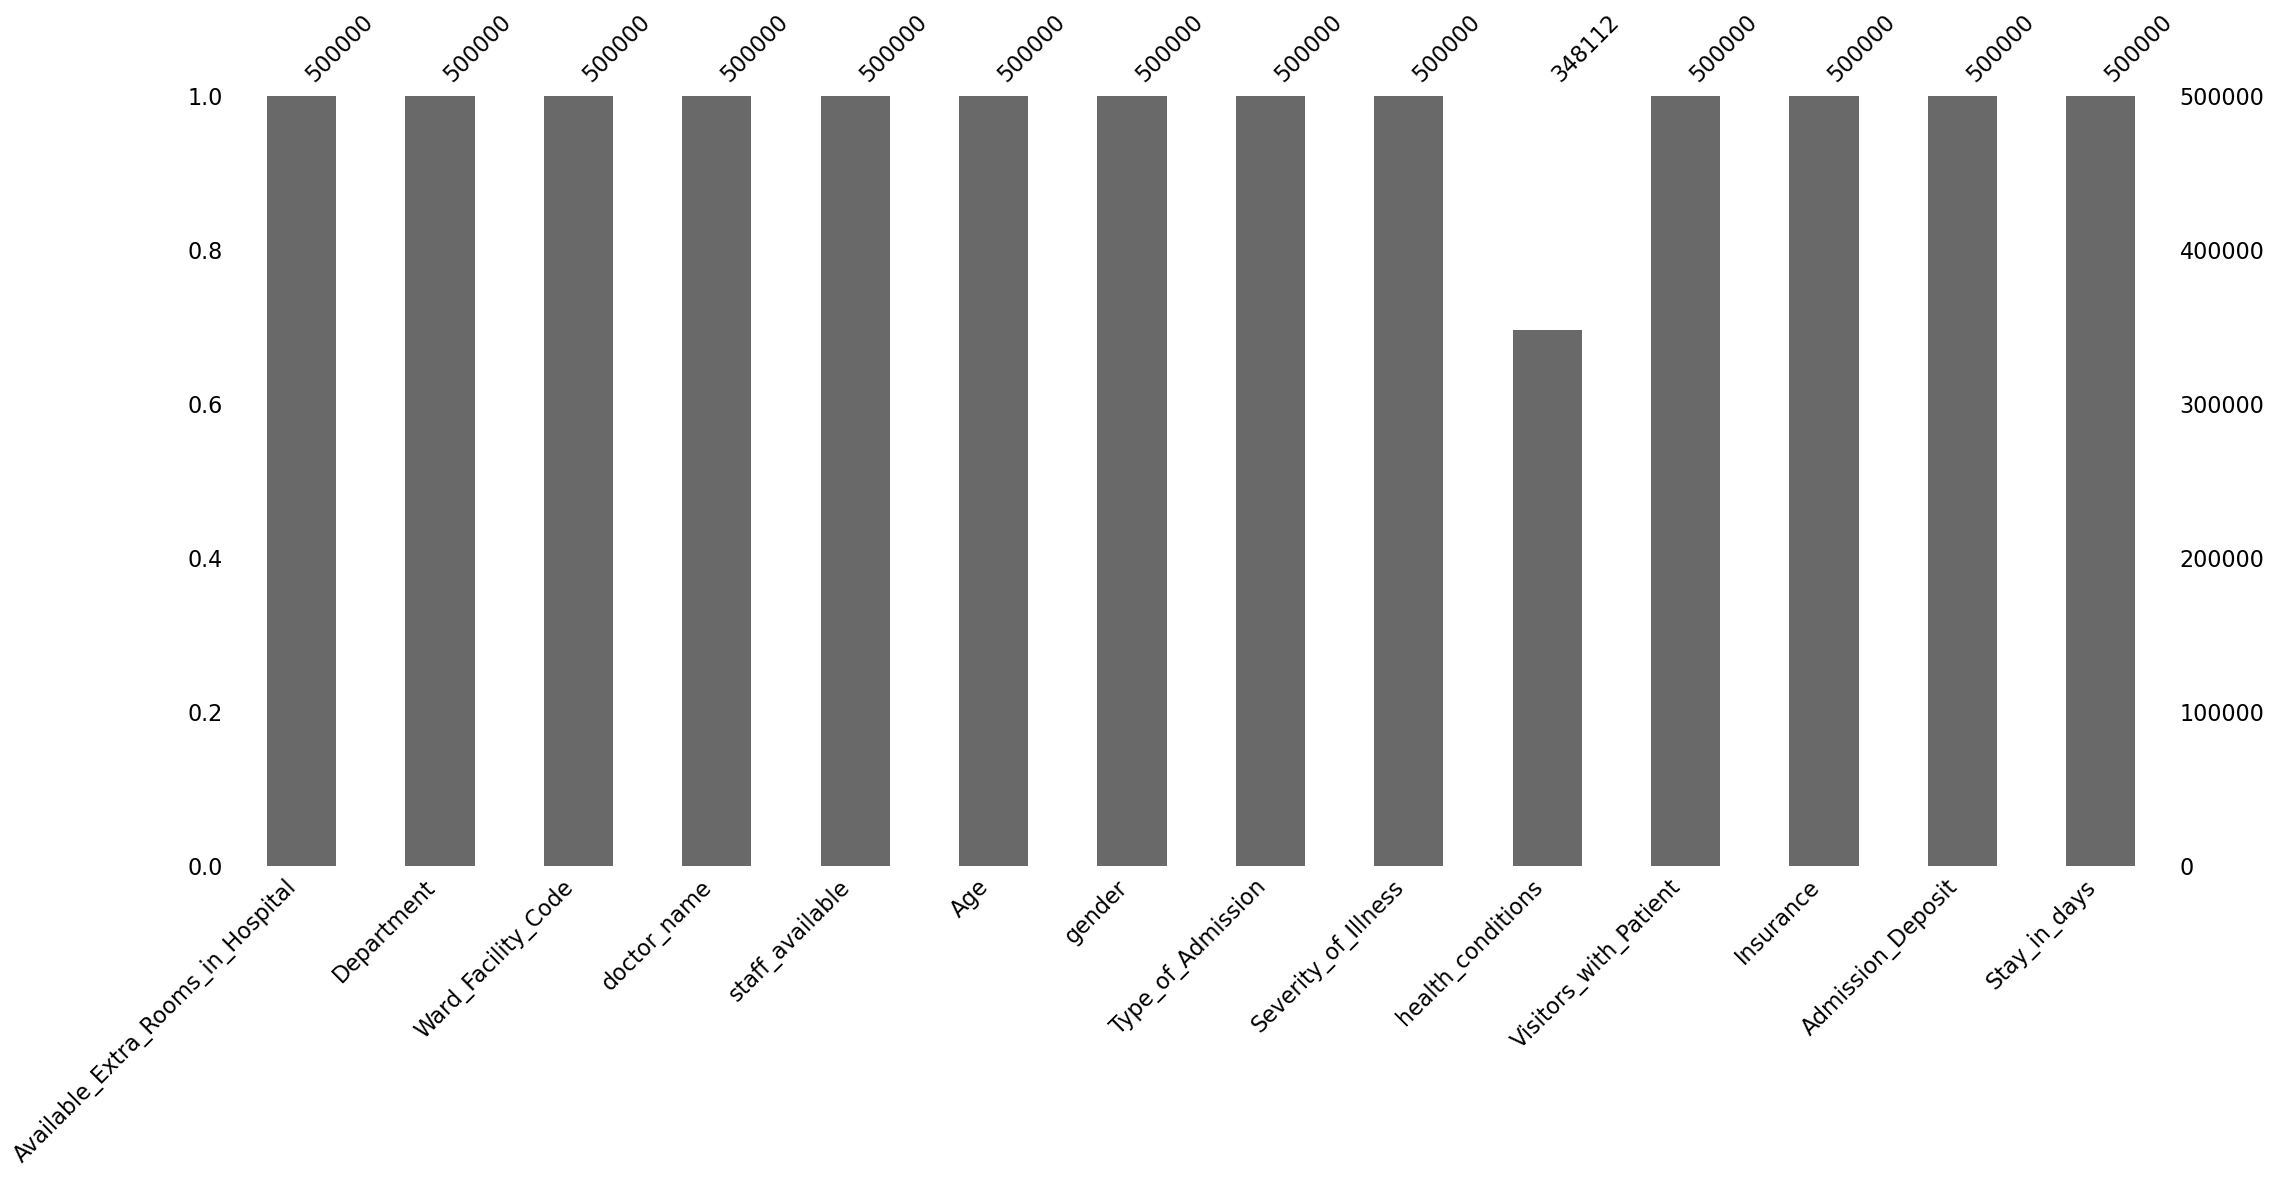

In [62]:
import missingno as msno
msno.bar(df)
plt.show()

In [63]:
(df.isnull().sum()/len(df))*100

Available_Extra_Rooms_in_Hospital     0.0000
Department                            0.0000
Ward_Facility_Code                    0.0000
doctor_name                           0.0000
staff_available                       0.0000
Age                                   0.0000
gender                                0.0000
Type_of_Admission                     0.0000
Severity_of_Illness                   0.0000
health_conditions                    30.3776
Visitors_with_Patient                 0.0000
Insurance                             0.0000
Admission_Deposit                     0.0000
Stay_in_days                          0.0000
dtype: float64

**Inference**
* As previously noted, the "health_conditions" column contains approximately 30% null values. If we choose to impute these missing values using the mode, it could introduce bias into the model. Therefore, further analysis is necessary to determine whether we should remove this column altogether or drop the rows with null values.

## Outlier Treatment

In [66]:
q1 = df[num].quantile(0.25)
q3 = df[num].quantile(0.75)

iqr = q3-q1

ll = q1 - (1.5*iqr)
ul = q3 + (1.5*iqr)

print(ll)
print(ul)

Available_Extra_Rooms_in_Hospital      -1.000000
staff_available                        -7.000000
Visitors_with_Patient                  -1.000000
Admission_Deposit                    2541.867254
Stay_in_days                            3.500000
dtype: float64
Available_Extra_Rooms_in_Hospital       7.000000
staff_available                        17.000000
Visitors_with_Patient                   7.000000
Admission_Deposit                    6621.459994
Stay_in_days                           15.500000
dtype: float64


In [67]:
df[((df[num]<ll)|(df[num]>ul)).any(axis=1)].shape

(172260, 14)

In [68]:
(df[((df[num]<ll)|(df[num]>ul)).any(axis=1)].shape[0]/df.shape[0])*100

34.452

**Inference**
* The dataset contains approximately 34% outliers, which is a significant proportion. However, due to the nature of the healthcare domain, where every piece of data is crucial for analysis, we cannot remove or cap these outliers. Therefore, we will proceed to the next steps in our analysis while retaining the outliers as they may provide valuable insights.

### Null value imputation

##### health_conditions

In [72]:
df = df.dropna(axis=0)

**Inference**
* As previously mentioned, every data point is important in the healthcare context. Removing the entire "health_conditions" column would result in the loss of valuable information. Therefore, we opted to drop only the null values from this column, preserving the remaining data for analysis.

## Univariate Analysis

#### Numeric columns

In [76]:
df[num].skew()

Available_Extra_Rooms_in_Hospital    4.684799
staff_available                     -0.009045
Visitors_with_Patient                3.721570
Admission_Deposit                    0.909478
Stay_in_days                         1.758216
dtype: float64

**Inference**
* The "Available_Extra_Rooms_in_Hospital" and "Visitors_with_Patient" columns show high positive skewness values of 4.68 and 3.72, respectively, indicating that most values are clustered toward the lower end, with a few larger values extending the distribution to the right.
* The "Stay_in_days" column has a moderate positive skewness of 1.76, suggesting that while the majority of stays are relatively short, there are some significantly longer hospital stays that skew the distribution.
* The "staff_available" column shows very low skewness (-0.009), indicating a near-symmetrical distribution, meaning values are fairly evenly distributed on both sides of the mean.

In [78]:
df[num].kurt()

Available_Extra_Rooms_in_Hospital    28.146133
staff_available                      -1.214119
Visitors_with_Patient                23.792375
Admission_Deposit                     1.454571
Stay_in_days                          2.129805
dtype: float64

**Inference**
* The "Available_Extra_Rooms_in_Hospital" and "Visitors_with_Patient" columns exhibit high kurtosis values of 28.15 and 23.79, respectively, indicating leptokurtic distributions. This suggests that these variables have heavy tails and a higher likelihood of extreme values, with most observations clustered near the mean.
* The "Stay_in_days" column has a kurtosis of 2.13, which is slightly above normal and also leptokurtic, suggesting a distribution with more pronounced peaks and heavier tails than a normal distribution, indicating some potential for outliers.
* The "staff_available" and "patientid" columns display negative kurtosis values (-1.21 and -1.38, respectively), indicating platykurtic distributions. This means these columns have lighter tails and are more evenly spread around the mean, with fewer extreme values compared to a normal distribution.

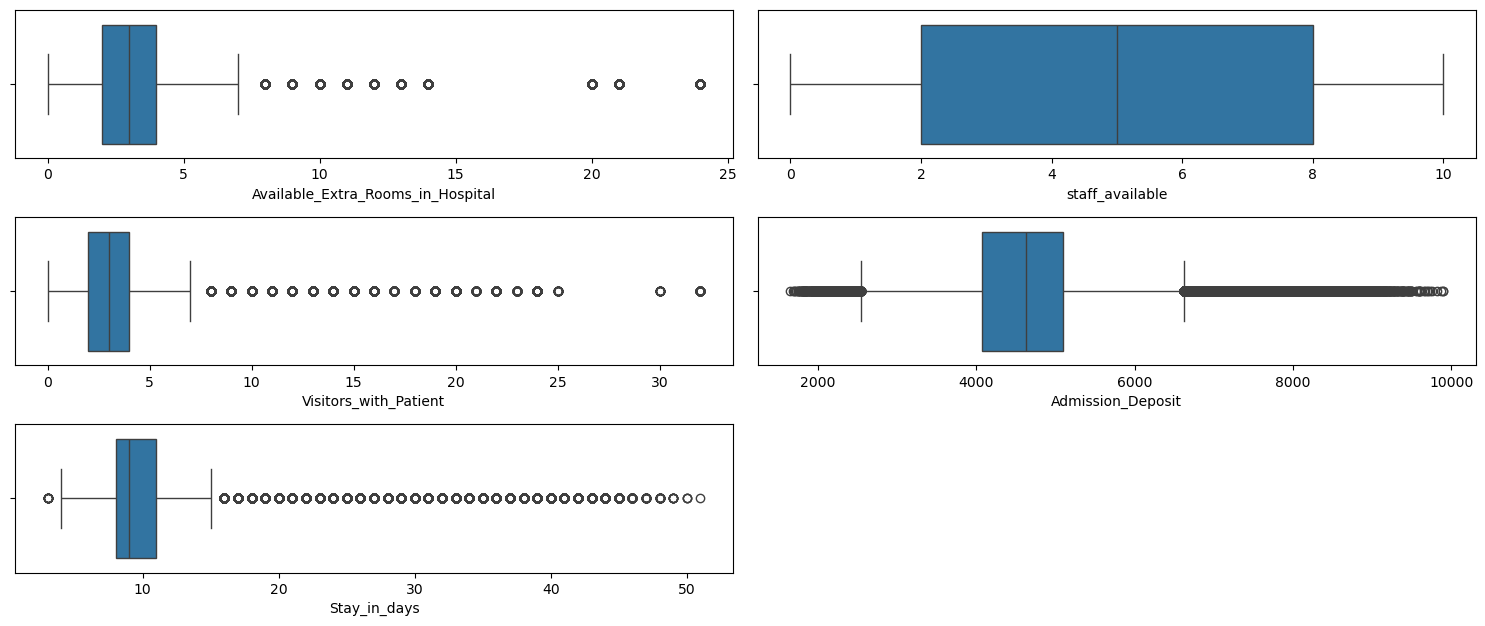

In [80]:
t=1
for i in num:
    plt.subplot(4,2,t)
    sns.boxplot(x= df[i])
    t+=1
plt.tight_layout()
plt.show()

#### Lets now visualize the skew and the distribution of data

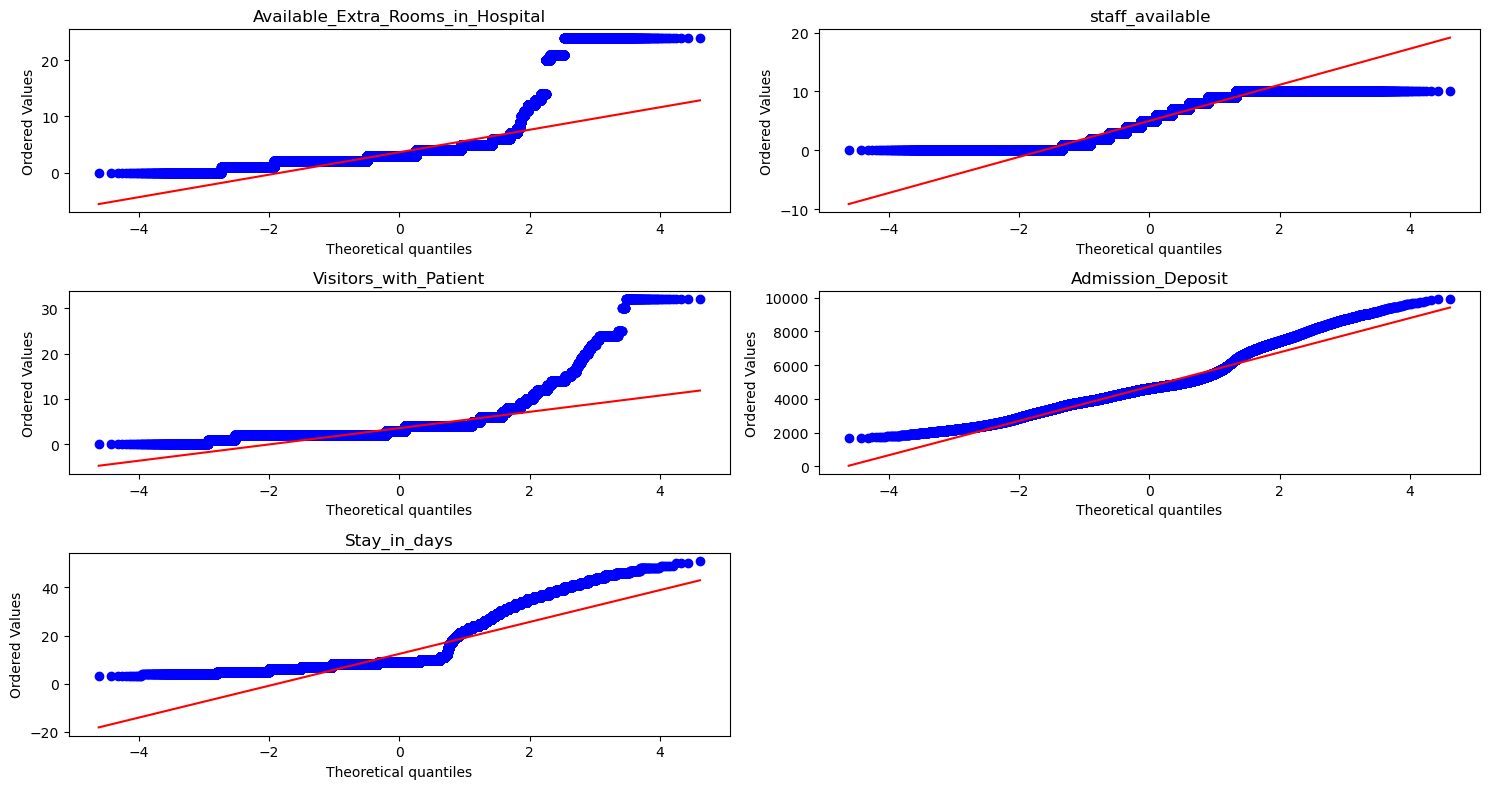

In [82]:
t=1
for i in num:
    plt.subplot(3,2,t)
    probplot(df[i], dist='norm', plot=plt)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

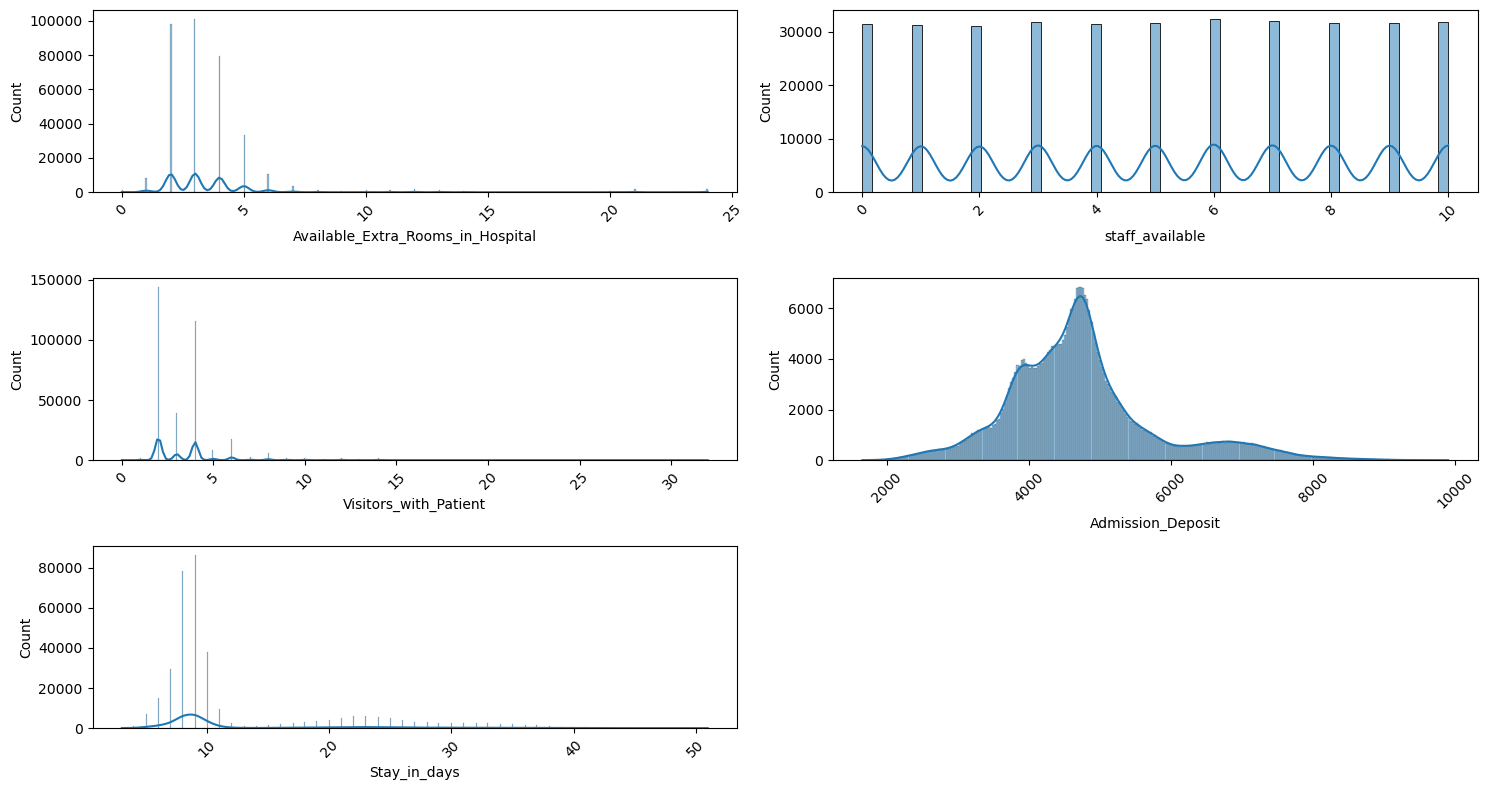

In [83]:
t=1
for i in num:
    plt.subplot(3,2,t)
    sns.histplot(df[i],kde= True)
    plt.xticks(rotation=45,fontsize = 10)
    t+=1
plt.tight_layout()
plt.show()

#### Categorical columns

In [85]:
for i in cat:
    print(i, df[i].unique())
    print("---------------------------")
    print()

Department ['gynecology' 'anesthesia' 'TB & Chest disease' 'radiotherapy' 'surgery']
---------------------------

Ward_Facility_Code ['D' 'B' 'E' 'F' 'A' 'C']
---------------------------

doctor_name ['Dr Sophia' 'Dr Mark' 'Dr Olivia' 'Dr John' 'Dr Sarah' 'Dr Sam'
 'Dr Nathan' 'Dr Simon' 'Dr Isaac']
---------------------------

Age ['41-50' '31-40' '21-30' '71-80' '11-20' '51-60' '61-70' '81-90' '91-100'
 '0-10']
---------------------------

gender ['Female' 'Male' 'Other']
---------------------------

Type_of_Admission ['Trauma' 'Emergency' 'Urgent']
---------------------------

Severity_of_Illness ['Extreme' 'Minor' 'Moderate']
---------------------------

health_conditions ['Diabetes' 'Heart disease' 'Other' 'Asthama' 'High Blood Pressure']
---------------------------

Insurance ['Yes' 'No']
---------------------------



In [86]:
for i in cat:
    print((df[i].value_counts(normalize=True))*100)
    print()

Department
gynecology            68.721561
radiotherapy          16.795169
anesthesia             8.857494
TB & Chest disease     4.585019
surgery                1.040757
Name: proportion, dtype: float64

Ward_Facility_Code
F    24.096555
D    23.831123
B    20.793882
E    19.066278
A     9.298731
C     2.913430
Name: proportion, dtype: float64

doctor_name
Dr Sarah     28.610332
Dr Sophia    21.473836
Dr Sam       11.092694
Dr Olivia    10.841913
Dr John      10.269683
Dr Mark       8.875304
Dr Nathan     7.795480
Dr Isaac      0.675070
Dr Simon      0.365687
Name: proportion, dtype: float64

Age
31-40     27.622432
21-30     26.872386
41-50     16.151124
11-20     13.368111
61-70      5.298582
51-60      4.353197
71-80      3.735867
81-90      1.647746
0-10       0.679379
91-100     0.271177
Name: proportion, dtype: float64

gender
Female    74.210886
Male      20.643069
Other      5.146045
Name: proportion, dtype: float64

Type_of_Admission
Trauma       62.071977
Emergency    27.208

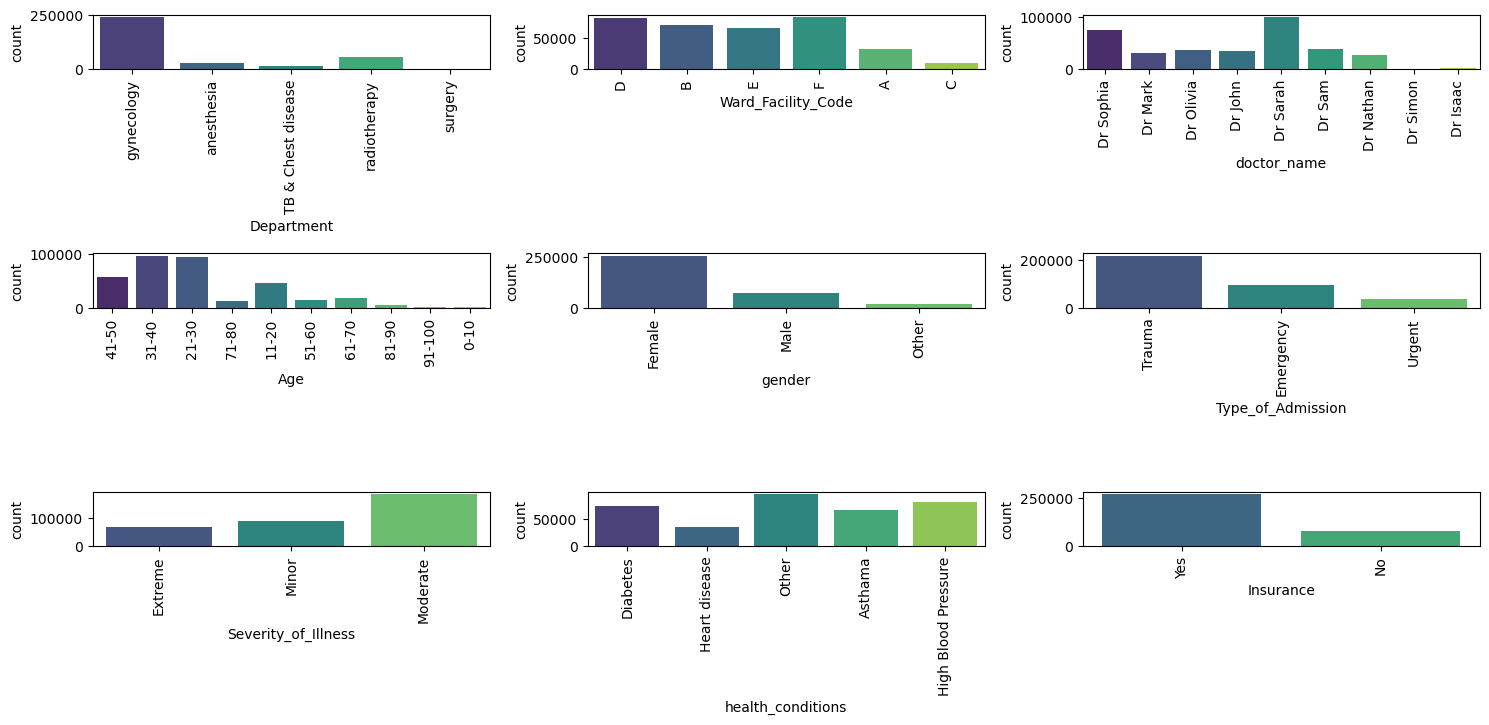

In [87]:
t = 1

for i in cat:
    plt.subplot(4,3,t)
    sns.countplot(x=df[i], palette='viridis')
    plt.xticks(rotation= 90)
    t+=1

plt.tight_layout()
plt.show()

## Bivariate Analysis

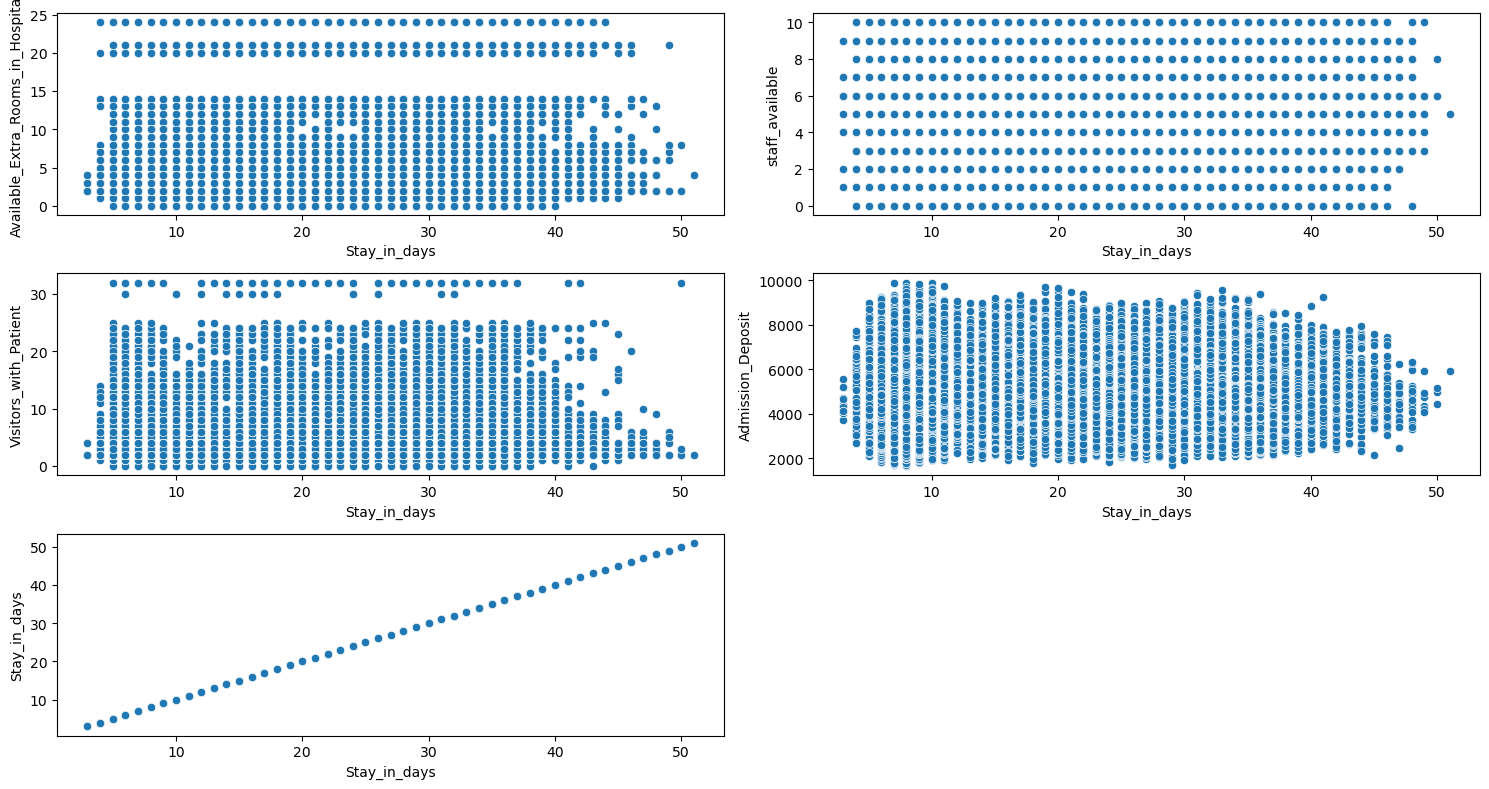

In [89]:
t=1
for i in num:
        plt.subplot(3,2,t)
        sns.scatterplot(y=df[i],x= df['Stay_in_days'])
        t+=1
plt.tight_layout()
plt.show()

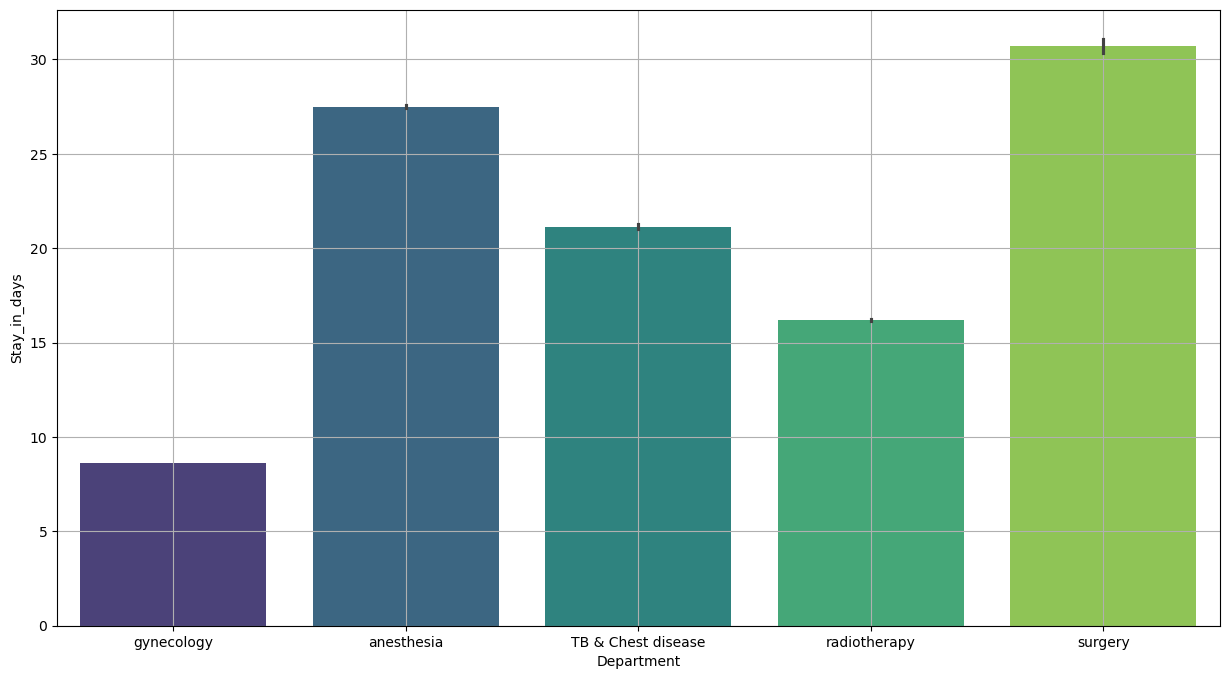

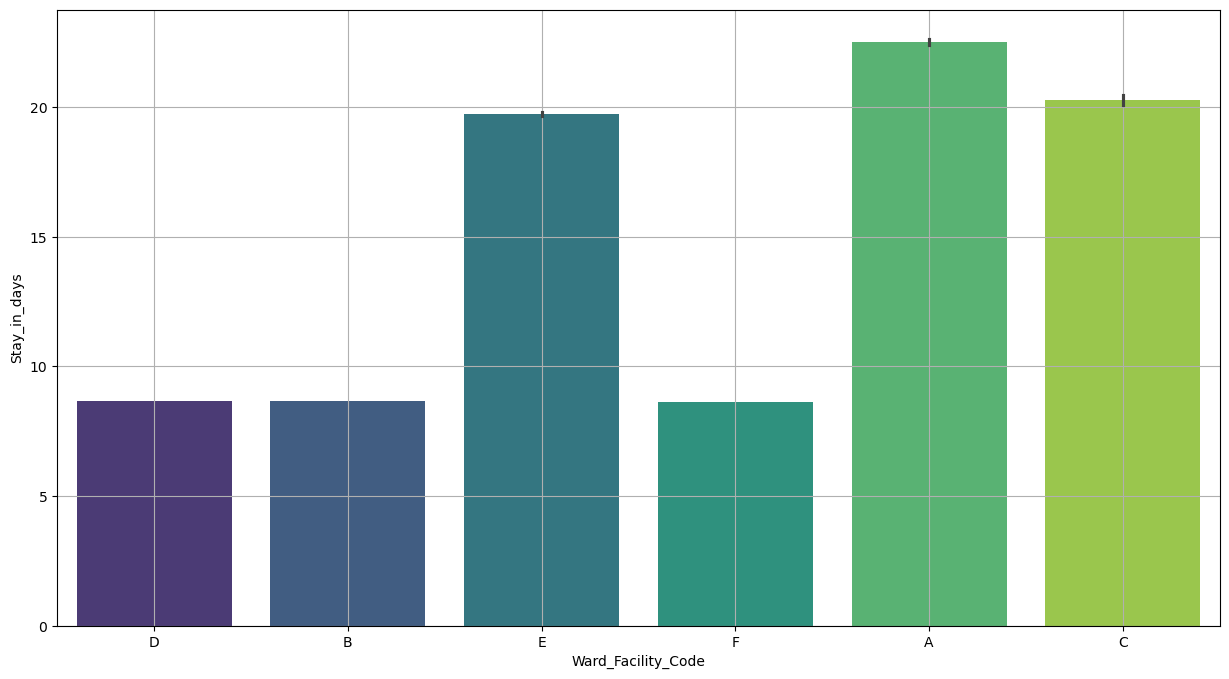

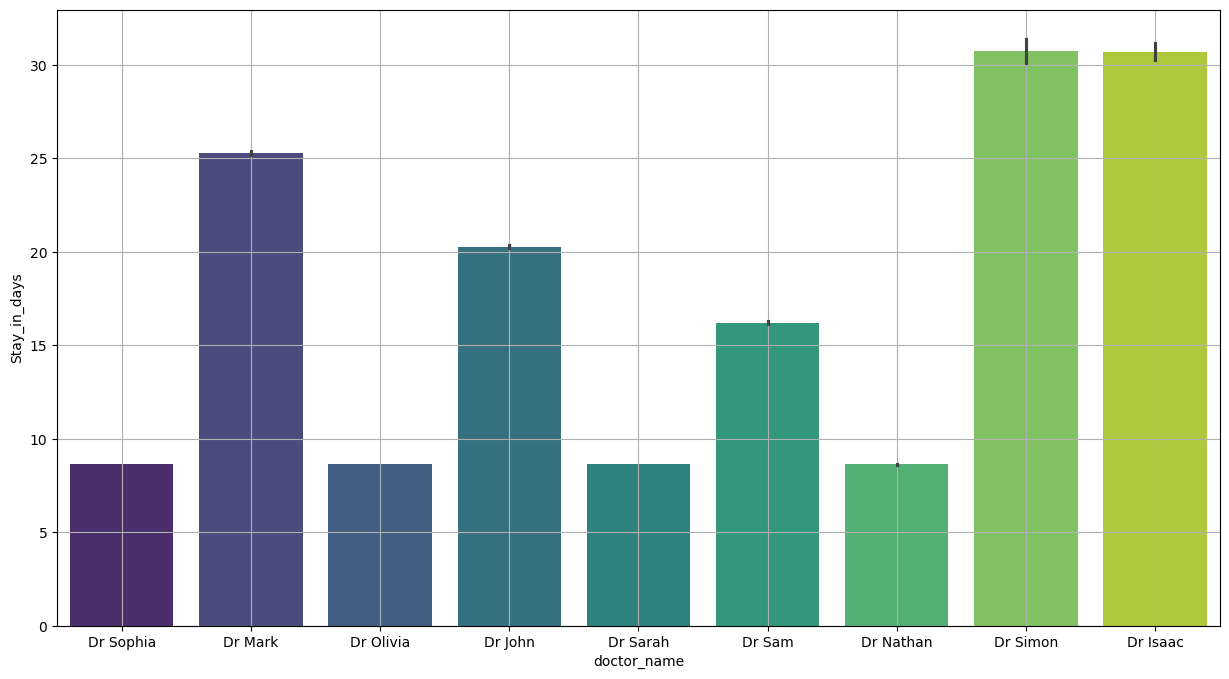

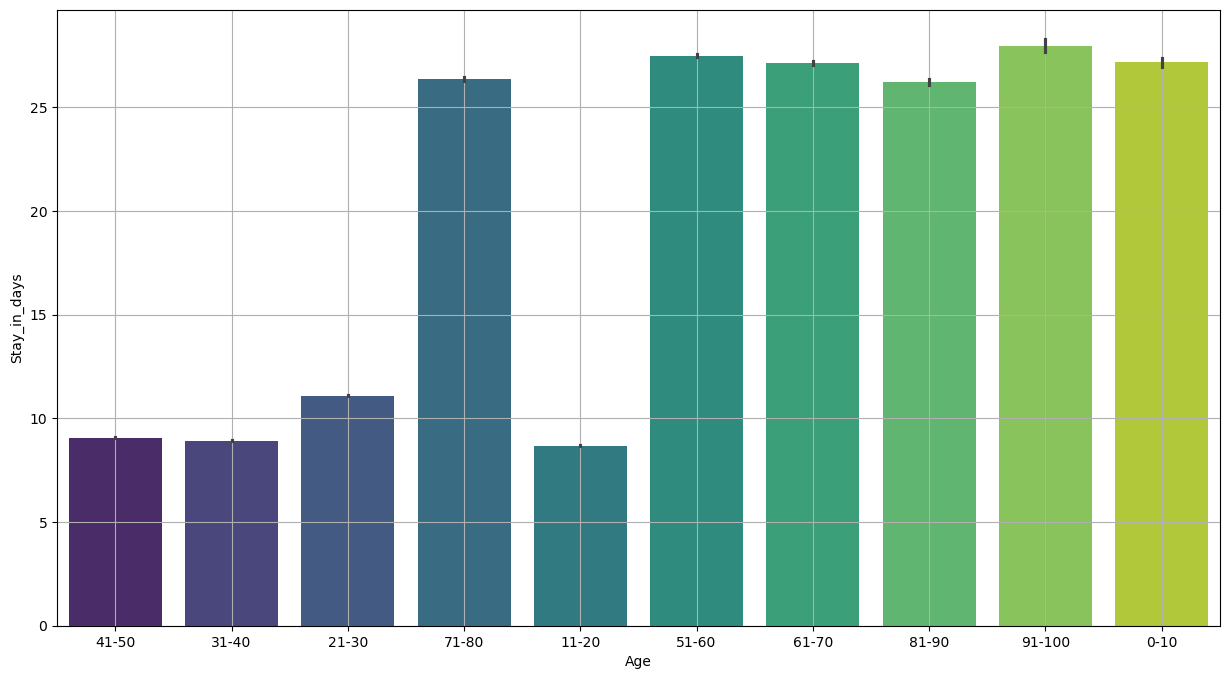

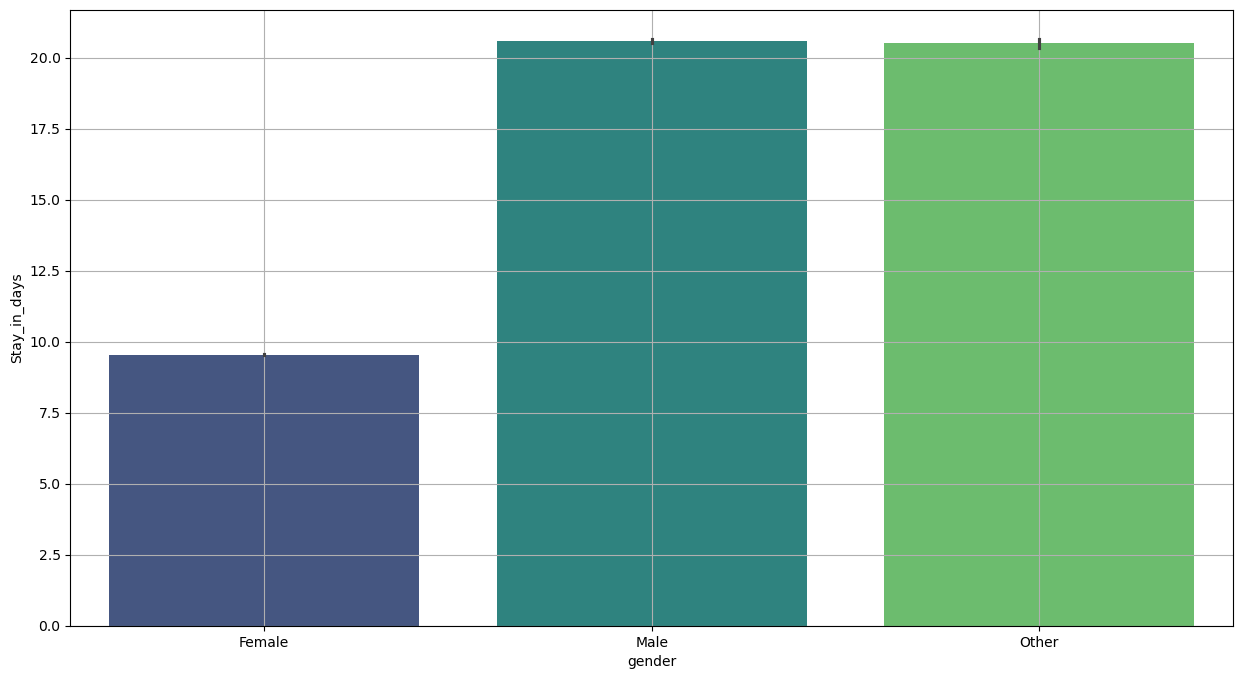

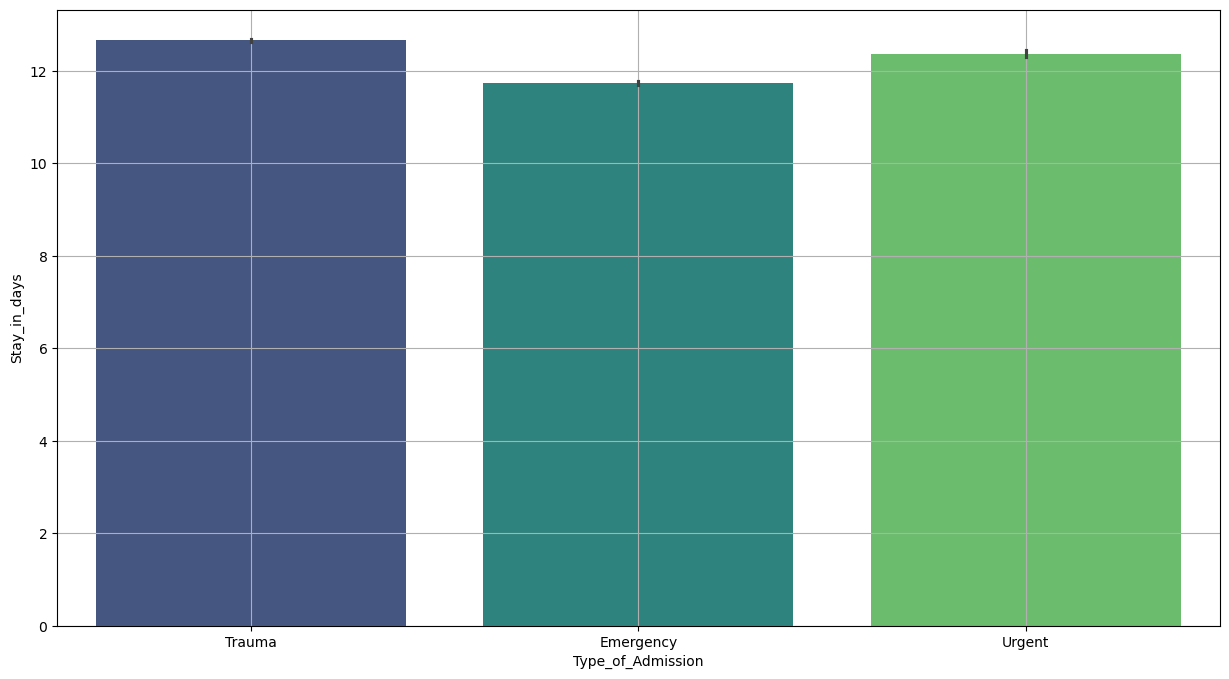

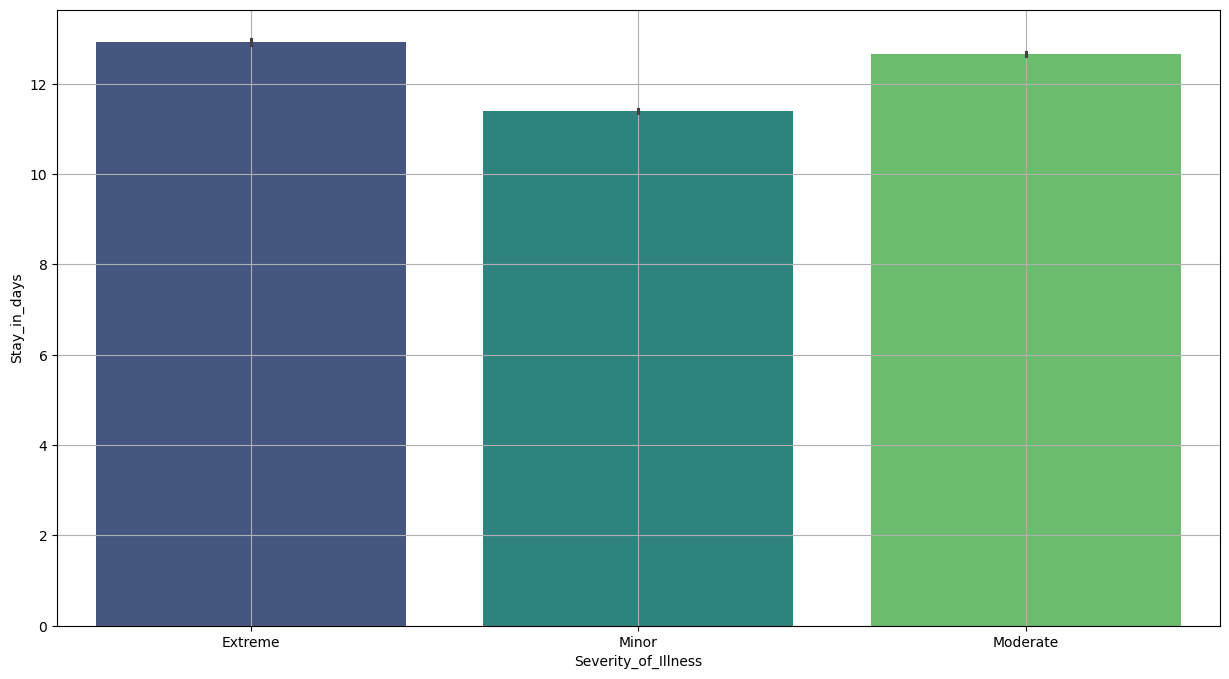

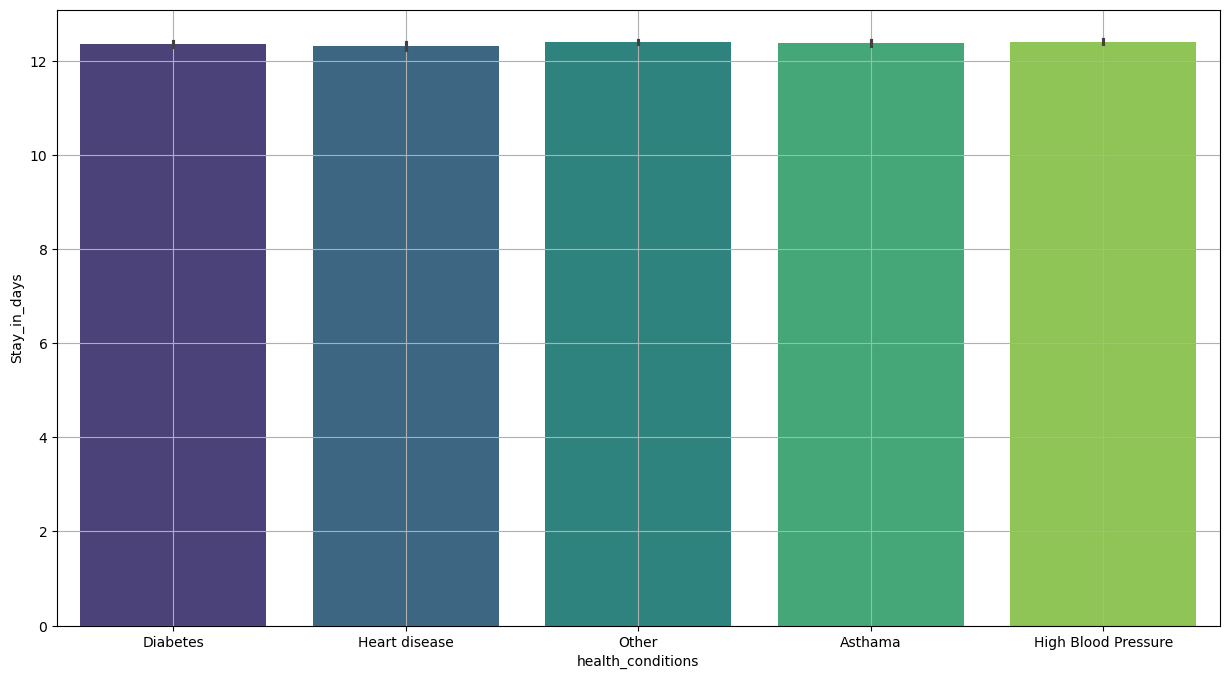

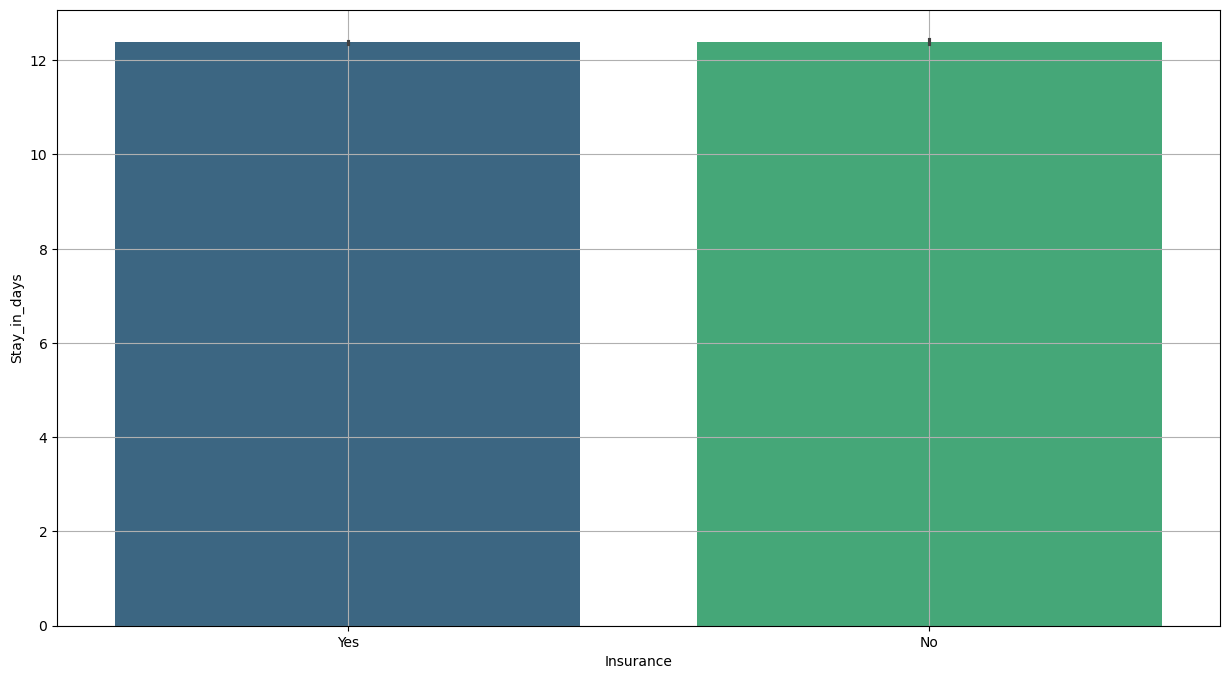

In [90]:
for i in cat:
    sns.barplot(data=df,x= df[i],y=df['Stay_in_days'], palette='viridis')
    plt.grid()
    plt.show()

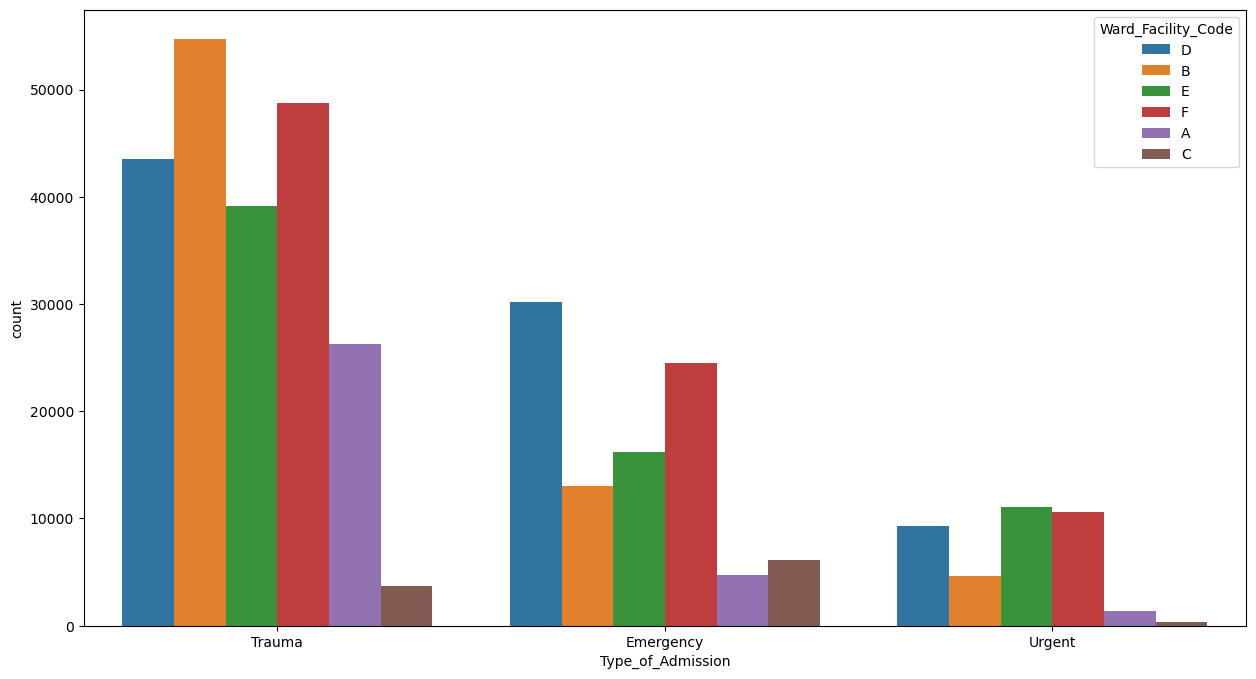

In [91]:
sns.countplot(x=df['Type_of_Admission'],hue= df['Ward_Facility_Code'])
plt.show()

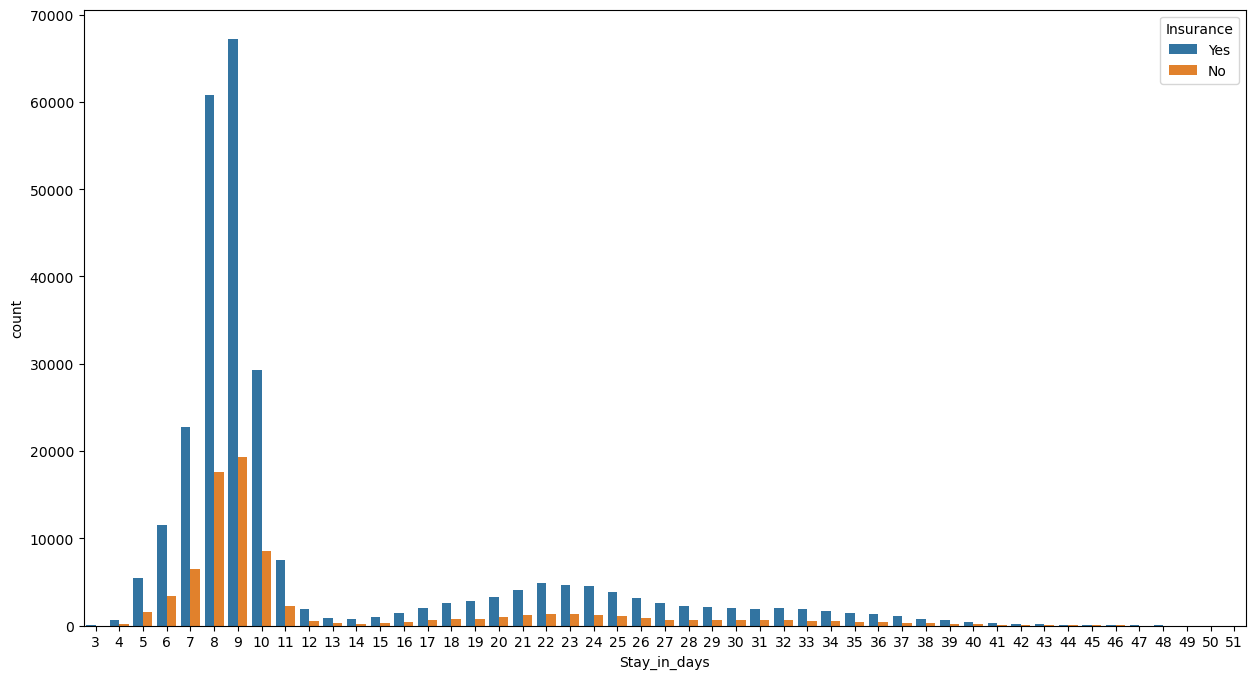

In [92]:
sns.countplot(x=df['Stay_in_days'],hue= df['Insurance'])
plt.show()

## Multivariate Analysis

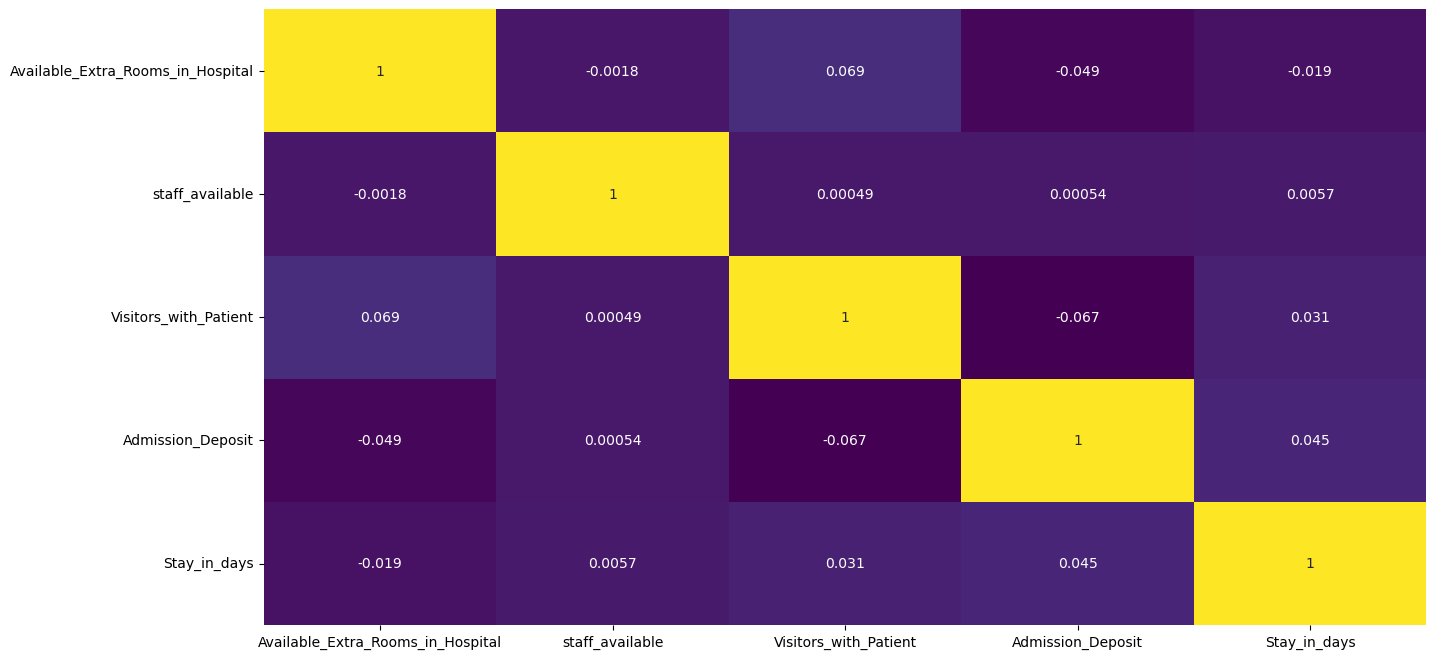

In [94]:
sns.heatmap(df[num].corr(), annot=True, cmap='viridis', cbar=False)
plt.show()

**Inference**
* Most features show very low correlation with the target variable "Stay_in_days." The highest correlation with "Stay_in_days" is observed in "Admission_Deposit" (0.0445) and "Visitors_with_Patient" (0.0308), suggesting that these features have only minimal linear relationships with the length of hospital stay.
* "Available_Extra_Rooms_in_Hospital" and "Visitors_with_Patient" have a positive correlation of 0.0693, indicating a weak association. However, this correlation is still minimal, implying limited dependency between the two variables.
* "Admission_Deposit" has a weak negative correlation with "Visitors_with_Patient" (-0.0672) and "Available_Extra_Rooms_in_Hospital" (-0.0495), suggesting that as the deposit amount changes, it is minimally associated with variations in room availability and visitor numbers.
* Overall, the correlation matrix indicates that most features have low correlation values with each other and with the target variable, meaning that these variables may contribute independently in the model without strong multicollinearity issues.

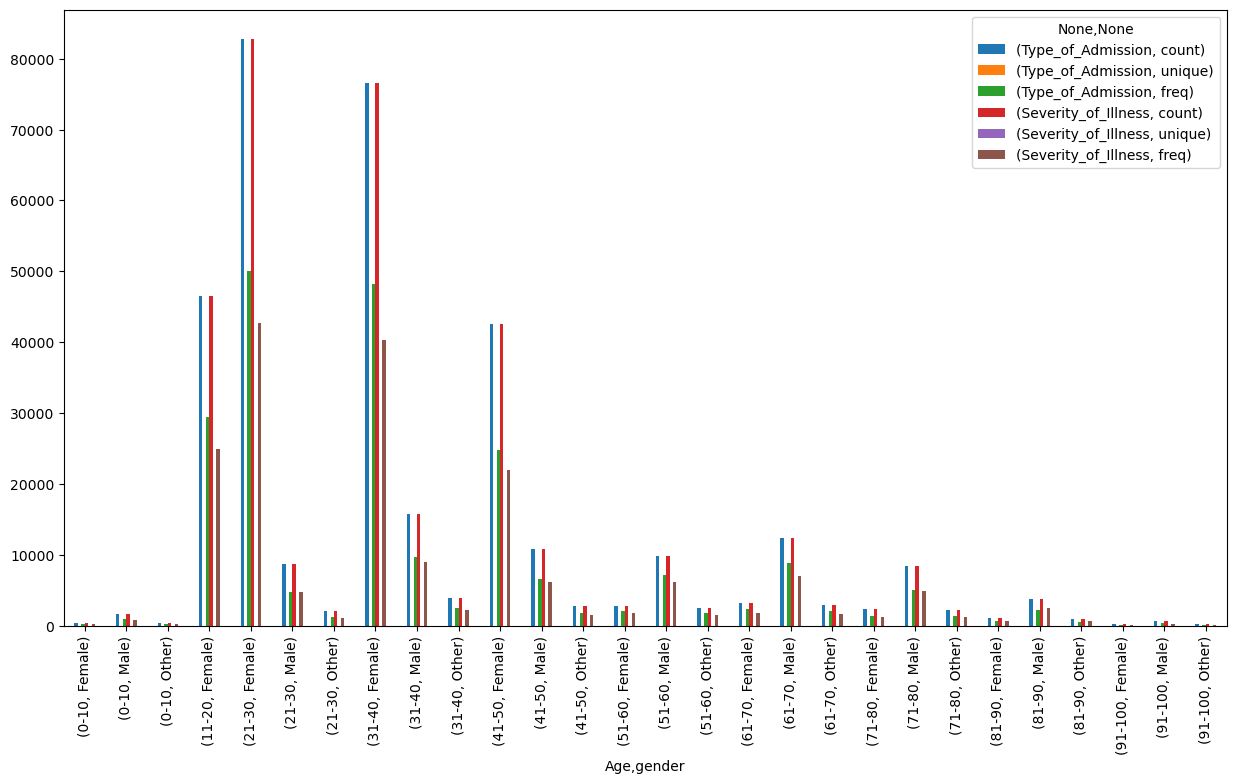

In [96]:
df.groupby(['Age','gender'])[['Type_of_Admission','Severity_of_Illness']].describe().plot(kind='bar')
plt.show()

## Advanced Analysis

In [98]:
cat

['Department',
 'Ward_Facility_Code',
 'doctor_name',
 'Age',
 'gender',
 'Type_of_Admission',
 'Severity_of_Illness',
 'health_conditions',
 'Insurance']

In [99]:
df.groupby('Age')['gender'].describe()

,count,unique,top,freq
Age,,,,
0-10,2365,3,Male,1573
11-20,46536,1,Female,46536
21-30,93546,3,Female,82801
31-40,96157,3,Female,76573
41-50,56224,3,Female,42564
51-60,15154,3,Male,9883
61-70,18445,3,Male,12294
71-80,13005,3,Male,8477
81-90,5736,3,Male,3791


In [100]:
df.groupby(['Age','gender'])['health_conditions'].describe()

count unique                  top   freq
Age    gender                                          
0-10   Female    415      5                Other    111
       Male     1573      5                Other    451
       Other     377      5                Other     98
11-20  Female  46536      2  High Blood Pressure  25536
21-30  Female  82801      5                Other  38108
       Male     8652      5                Other   2431
       Other    2093      5                Other    530
31-40  Female  76573      5        Heart disease  17905
       Male    15730      5                Other   4202
       Other    3854      5                Other   1049
41-50  Female  42564      5                Other  11490
       Male    10849      5                Other   2965
       Other    2811      5                Other    729
51-60  Female   2804      5                Other    793
       Male     9883      5                Other   2663
       Other    2467      5                Other    667
61-70  Female   3178      5                Other    885
       Male    12294      5                Other   3395
       Other    2973      5                Other    808
71-80  Female   2293      5                Other    599
       Male     8477      5                Other   2329
       Other    2235      5                Other    616
81-90  Female   1002      5                Other    261
       Male     3791      5                Other   1036
       Other     943      5                Other    247
91-100 Female    171      5                Other     48
       Male      612      5                Other    161
       Other     161      5  High Blood Pressure     43

In [101]:
df.groupby(['Age','gender'])['Department'].describe()

count unique                 top   freq
Age    gender                                         
0-10   Female    415      4        radiotherapy    171
       Male     1573      4        radiotherapy    718
       Other     377      4        radiotherapy    167
11-20  Female  46536      1          gynecology  46536
21-30  Female  82801      5          gynecology  80522
       Male     8652      4        radiotherapy   5193
       Other    2093      4        radiotherapy   1222
31-40  Female  76573      5          gynecology  72395
       Male    15730      4        radiotherapy   9055
       Other    3854      4        radiotherapy   2197
41-50  Female  42564      5          gynecology  39775
       Male    10849      4        radiotherapy   5761
       Other    2811      4        radiotherapy   1547
51-60  Female   2804      4        radiotherapy   1276
       Male     9883      4        radiotherapy   4775
       Other    2467      4        radiotherapy   1190
61-70  Female   3178      4        radiotherapy   1462
       Male    12294      4        radiotherapy   5558
       Other    2973      4        radiotherapy   1375
71-80  Female   2293      4        radiotherapy   1336
       Male     8477      4        radiotherapy   4952
       Other    2235      4        radiotherapy   1353
81-90  Female   1002      4        radiotherapy    647
       Male     3791      4        radiotherapy   2462
       Other     943      4        radiotherapy    598
91-100 Female    171      4  TB & Chest disease     72
       Male      612      4  TB & Chest disease    299
       Other     161      3  TB & Chest disease     85

In [102]:
df.groupby('Age')['Severity_of_Illness'].describe()

,count,unique,top,freq
Age,,,,
0-10,2365,3,Moderate,1197
11-20,46536,3,Moderate,24855
21-30,93546,3,Moderate,48552
31-40,96157,3,Moderate,51476
41-50,56224,3,Moderate,29658
51-60,15154,3,Moderate,9429
61-70,18445,3,Moderate,10442
71-80,13005,3,Moderate,7360
81-90,5736,3,Moderate,3630


In [103]:
df.groupby('Severity_of_Illness')['Visitors_with_Patient'].describe()

,count,mean,std,min,25%,50%,75%,max
Severity_of_Illness,,,,,,,,
Extreme,69584.0,3.356576,2.063946,0.0,2.0,3.0,4.0,32.0
Minor,91497.0,3.517930,2.122059,0.0,2.0,3.0,4.0,32.0
Moderate,187031.0,3.610696,2.361936,0.0,2.0,3.0,4.0,32.0


In [104]:
df.groupby('Severity_of_Illness')[['Visitors_with_Patient','Stay_in_days']].describe()

Visitors_with_Patient                                     \
                                    count      mean       std  min  25%  50%   
Severity_of_Illness                                                            
Extreme                           69584.0  3.356576  2.063946  0.0  2.0  3.0   
Minor                             91497.0  3.517930  2.122059  0.0  2.0  3.0   
Moderate                         187031.0  3.610696  2.361936  0.0  2.0  3.0   

                               Stay_in_days                                 \
                     75%   max        count       mean       std  min  25%   
Severity_of_Illness                                                          
Extreme              4.0  32.0      69584.0  12.936307  8.417804  3.0  8.0   
Minor                4.0  32.0      91497.0  11.395237  6.921492  3.0  8.0   
Moderate             4.0  32.0     187031.0  12.661553  8.120139  3.0  8.0   

                                      
                     50%   75%   max  
Severity_of_Illness                   
Extreme              9.0  16.0  50.0  
Minor                9.0  10.0  50.0  
Moderate             9.0  12.0  51.0

In [105]:
df.groupby('doctor_name')['Department'].describe().reset_index()

,doctor_name,count,unique,top,freq
0,Dr Isaac,2350,1,surgery,2350
1,Dr John,35750,3,radiotherapy,19851
2,Dr Mark,30896,2,anesthesia,20324
3,Dr Nathan,27137,1,gynecology,27137
4,Dr Olivia,37742,1,gynecology,37742
5,Dr Sam,38615,1,radiotherapy,38615
6,Dr Sarah,99596,1,gynecology,99596
7,Dr Simon,1273,1,surgery,1273
8,Dr Sophia,74753,1,gynecology,74753


In [106]:
df.groupby('doctor_name')[['Department','Stay_in_days']].describe().reset_index()

doctor_name Stay_in_days                                                   
                     count       mean        std  min   25%   50%   75%   max
0    Dr Isaac       2350.0  30.696596  11.179801  8.0  17.0  35.0  39.0  51.0
1     Dr John      35750.0  20.280308   9.738053  3.0  12.0  22.0  27.0  48.0
2     Dr Mark      30896.0  25.286930   8.777211  4.0  18.0  27.0  32.0  49.0
3   Dr Nathan      27137.0   8.625345   1.098950  4.0   8.0   9.0   9.0  13.0
4   Dr Olivia      37742.0   8.644534   1.015331  4.0   8.0   9.0   9.0  13.0
5      Dr Sam      38615.0  16.203574   8.467412  3.0   6.0  20.0  23.0  32.0
6    Dr Sarah      99596.0   8.658089   1.084408  3.0   8.0   9.0   9.0  13.0
7    Dr Simon       1273.0  30.749411  11.347812  9.0  17.0  35.0  39.0  50.0
8   Dr Sophia      74753.0   8.628229   1.062482  4.0   8.0   9.0   9.0  14.0

In [107]:
df.groupby('doctor_name')['health_conditions'].describe()

,count,unique,top,freq
doctor_name,,,,
Dr Isaac,2350,5,Other,695
Dr John,35750,5,Other,9592
Dr Mark,30896,5,Other,8466
Dr Nathan,27137,1,Other,27137
Dr Olivia,37742,1,Other,37742
Dr Sam,38615,5,Other,10472
Dr Sarah,99596,2,High Blood Pressure,54562
Dr Simon,1273,5,Diabetes,309
Dr Sophia,74753,2,Diabetes,50473


In [108]:
df.groupby(['Department','Ward_Facility_Code'])['health_conditions'].describe()

count unique    top   freq
Department         Ward_Facility_Code                            
TB & Chest disease A                    3306      5  Other    948
                   C                     930      5  Other    246
                   E                   11725      5  Other   3206
anesthesia         A                   10902      5  Other   2932
                   C                    2945      5  Other    764
                   E                   16987      5  Other   4633
gynecology         B                   72386      5  Other  19579
                   D                   82959      5  Other  22537
                   F                   83883      5  Other  22763
radiotherapy       A                   14539      5  Other   4025
                   C                    6267      5  Other   1739
                   E                   37660      5  Other  10037
surgery            A                    3623      5  Other   1002

In [109]:
df.groupby(['Department','Ward_Facility_Code'])['Stay_in_days'].describe()

count       mean        std   min  \
Department         Ward_Facility_Code                                        
TB & Chest disease A                    3306.0  21.344223   8.528537   5.0   
                   C                     930.0  20.420430   8.003270   7.0   
                   E                   11725.0  21.110448   8.621549   4.0   
anesthesia         A                   10902.0  27.433774   7.808480   9.0   
                   C                    2945.0  27.812564   9.119872  11.0   
                   E                   16987.0  27.482840   8.016885  10.0   
gynecology         B                   72386.0   8.669867   1.032817   3.0   
                   D                   82959.0   8.650225   1.038377   4.0   
                   F                   83883.0   8.612401   1.126429   3.0   
radiotherapy       A                   14539.0  17.068024   8.062154   3.0   
                   C                    6267.0  16.706079   8.824788   4.0   
                   E                   37660.0  15.778571   8.526911   3.0   
surgery            A                    3623.0  30.715153  11.237583   8.0   

                                        25%   50%   75%   max  
Department         Ward_Facility_Code                          
TB & Chest disease A                   12.0  25.0  28.0  38.0  
                   C                   12.0  23.5  27.0  35.0  
                   E                   12.0  24.0  28.0  41.0  
anesthesia         A                   19.0  30.0  34.0  47.0  
                   C                   18.0  30.0  35.0  49.0  
                   E                   19.0  30.0  34.0  49.0  
gynecology         B                    8.0   9.0   9.0  13.0  
                   D                    8.0   9.0   9.0  14.0  
                   F                    8.0   9.0   9.0  13.0  
radiotherapy       A                    6.0  21.0  23.0  31.0  
                   C                    6.0  21.0  24.0  32.0  
                   E                    6.0  20.0  23.0  32.0  
surgery            A                   17.0  35.0  39.0  51.0

# STATISTICS

In [111]:
from scipy import stats
import statistics
from scipy.stats import stats,shapiro,levene

In [112]:
df2['Type of Admission'].unique()

array(['Trauma', 'Urgent', 'Emergency'], dtype=object)

In [113]:
#H0: ALL MEANS ARE EQUAL
#Ha: ATLEAST ONE MEAN IS NOT EQUAL

In [114]:
# sIGNIFICANCE VALUE: 0.95

In [115]:
trauma = df2[df2['Type of Admission']== 'Trauma']['Stay (in days)']
Urgent= df2[df2['Type of Admission']== 'Urgent']['Stay (in days)']
Emergency= df2[df2['Type of Admission']== 'Emergency']['Stay (in days)']

In [116]:
import scipy.stats as stats

print(stats.shapiro(trauma))
print(stats.shapiro(Urgent))
print(stats.shapiro(Emergency))

ShapiroResult(statistic=0.7107059498997179, pvalue=6.536274084354167e-170)
ShapiroResult(statistic=0.7209502169892428, pvalue=2.196325736541461e-126)
ShapiroResult(statistic=0.6766870731698884, pvalue=1.683128529848396e-154)


In [117]:
print(stats.levene(trauma,Urgent,Emergency))

LeveneResult(statistic=700.5049657672507, pvalue=1.5848556529566841e-304)


In [118]:
stats.f_oneway(trauma,Urgent,Emergency)

F_onewayResult(statistic=644.0660020291162, pvalue=4.419598387929925e-280)

In [119]:
# Since pval is lesser than sig_val we reject null hypothesis
#At least one mean is not equal

In [1]:
# Lets find the column which has unequal mean

In [121]:
import statsmodels.stats.multicomp as mc

In [122]:
mc.pairwise_tukeyhsd(df2['Stay (in days)'],df2['Type of Admission'],alpha= 0.95).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Emergency,Trauma,0.9227,0.0,0.9149,0.9306,True
Emergency,Urgent,0.6227,0.0,0.6104,0.635,True
Trauma,Urgent,-0.3001,0.0,-0.3113,-0.2888,True


In [123]:
df2['Severity of Illness'].unique()

array(['Extreme', 'Minor', 'Moderate'], dtype=object)

In [124]:
Extreme = df2[df2['Severity of Illness']=='Extreme']['Stay (in days)']
Minor= df2[df2['Severity of Illness']=='Minor']['Stay (in days)']
Moderate= df2[df2['Severity of Illness']=='Moderate']['Stay (in days)']

In [125]:
print(stats.shapiro(Extreme))
print(stats.shapiro(Minor))
print(stats.shapiro(Moderate))

ShapiroResult(statistic=0.7128379749631994, pvalue=5.68939538205286e-140)
ShapiroResult(statistic=0.6525028462340619, pvalue=4.747192409605749e-156)
ShapiroResult(statistic=0.7213663450348098, pvalue=1.9783613775838948e-166)


In [126]:
print(stats.levene(Extreme,Minor,Moderate))

LeveneResult(statistic=1335.4520773222225, pvalue=0.0)


In [127]:
stats.f_oneway(Extreme,Minor,Moderate)

F_onewayResult(statistic=1229.300992790863, pvalue=0.0)

In [128]:
mc.pairwise_tukeyhsd(df2['Stay (in days)'],df2['Severity of Illness'],alpha=0.95).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Extreme,Minor,-1.2315,0.0,-1.242,-1.221,True
Extreme,Moderate,0.0334,0.517,0.0241,0.0427,True
Minor,Moderate,1.2649,0.0,1.2568,1.2729,True


In [129]:
#Inferance
# - Since since the severity of illness is prone to have different mean on the basis of sickness

## Feature Engineering

### Transformation

In [132]:
num1 = ['Available_Extra_Rooms_in_Hospital',
 'staff_available',
 'Visitors_with_Patient',
 'Admission_Deposit']

In [133]:
pt = PowerTransformer()
df[num1] = pt.fit_transform(df[num1])
df[num1].head()

,Available_Extra_Rooms_in_Hospital,staff_available,Visitors_with_Patient,Admission_Deposit
0,0.530606,-1.748855,0.603955,-2.051027
1,0.530606,-0.919489,-0.956991,-1.206503
2,-0.950496,0.935794,-0.956991,0.917272
4,-0.950496,1.467338,-0.956991,0.528351
5,-0.950496,-0.919489,-0.956991,-0.071917


In [134]:
df[num1].skew()

Available_Extra_Rooms_in_Hospital   -0.192984
staff_available                     -0.215536
Visitors_with_Patient               -0.119494
Admission_Deposit                   -0.001838
dtype: float64

**Inference**
* Applying the Yeo-Johnson transformation successfully reduced skewness across all variables, particularly for "Available_Extra_Rooms_in_Hospital" and "Visitors_with_Patient," which had high positive skewness prior to transformation. This transformation has made these distributions closer to normal, improving symmetry.
* After transformation, all features now have skewness values near zero, suggesting that the Yeo-Johnson method was effective in normalizing the data, which may enhance model performance and stability.

### Scaling the data

In [137]:
df_sc = df.copy()

In [138]:
sc = StandardScaler()
df_sc[num1] = sc.fit_transform(df_sc[num1])
df_sc[num1].head()

,Available_Extra_Rooms_in_Hospital,staff_available,Visitors_with_Patient,Admission_Deposit
0,0.530606,-1.748855,0.603955,-2.051027
1,0.530606,-0.919489,-0.956991,-1.206503
2,-0.950496,0.935794,-0.956991,0.917272
4,-0.950496,1.467338,-0.956991,0.528351
5,-0.950496,-0.919489,-0.956991,-0.071917


In [139]:
df_sc[num1].skew()

Available_Extra_Rooms_in_Hospital   -0.192984
staff_available                     -0.215536
Visitors_with_Patient               -0.119494
Admission_Deposit                   -0.001838
dtype: float64

**Inference**
* The skewness values remained unchanged after applying the StandardScaler, confirming that scaling affects the data's range but does not alter its distribution shape. This means the Yeo-Johnson transformation was effective in normalizing the data, and scaling has now standardized the feature ranges without impacting skewness.

### Encoding

#### Label Encoding

##### Ward_Facility_Code

In [144]:
le= LabelEncoder()

In [145]:
df['Ward_Facility_Code']= le.fit_transform(df[['Ward_Facility_Code']])

**Inference**
* The "Ward_Facility_Code" column, which contains six unique categories ('D', 'B', 'E', 'F', 'A', 'C'), has been transformed using label encoding to convert these categorical codes into numeric labels, facilitating their use in model training. This encoding preserves the distinct identities of each ward while making the data more suitable for machine learning algorithms.

#### Frequency Encoding

##### doctor_name

In [149]:
a= df['doctor_name'].value_counts(normalize=True)

In [150]:
df['doctor_name']= df['doctor_name'].map(a)

**Inference**
* The "doctor_name" column, containing nine unique doctors, has been transformed using frequency encoding, which assigns values based on the occurrence count of each doctor. This encoding captures the relative frequency of each doctor's presence in the dataset, allowing the model to consider the impact of doctor frequency on outcomes without assigning arbitrary numerical values.

#### Binary Encoding

##### gender

In [154]:
df['gender'].replace({'Female':0,'Male':1,'Other':2},inplace = True)

##### Severity_of_Illness

In [156]:
df['Severity_of_Illness'].replace({'Minor':0,'Moderate':1,'Extreme':2},inplace = True)

##### Insurance

In [158]:
df['Insurance'].replace({'Yes':1,'No':2},inplace = True)

**Inference**
* The "gender" column has been encoded with numerical values, where 'Female' is represented as 0, 'Male' as 1, and 'Other' as 2. This transformation enables the model to process gender as a numerical feature.
* The "Severity_of_Illness" column has been transformed to numerical labels, with 'Minor' as 0, 'Moderate' as 1, and 'Extreme' as 2, allowing the model to understand the varying levels of illness severity in a structured way.
* The "Insurance" column has been encoded such that 'Yes' is represented by 1 and 'No' by 2, making it easier for the model to differentiate between insured and uninsured patients in a binary format.

##### Age

In [161]:
age_group_mapping = {
    '0-10': 'Young', '11-20': 'Young', '21-30': 'Young',
    '31-40': 'Middle-aged', '41-50': 'Middle-aged', '51-60': 'Middle-aged',
    '61-70': 'Old', '71-80': 'Old', '81-90': 'Old', '91-100': 'Old'
}

df['Age_Group'] = df['Age'].replace(age_group_mapping)


In [162]:
df['Age_Group'].unique()

array(['Middle-aged', 'Young', 'Old'], dtype=object)

In [163]:
df['Age_Group'].replace({'Young':0,'Middle-aged':1,'Old':2},inplace = True)

In [164]:
df.drop('Age', axis=1, inplace=True)

**Inference**
* Age Group Mapping: The "Age" column has been categorized into age groups based on predefined ranges: 'Young' (0-30), 'Middle-aged' (31-60), and 'Old' (61-100). This grouping simplifies age-related patterns and makes it easier to analyze trends across life stages.
* Ordinal Encoding of Age Groups: The new "Age_Group" column has been ordinally encoded with numeric values, where 'Young' is represented as 0, 'Middle-aged' as 1, and 'Old' as 2. This encoding maintains the natural progression of age groups, allowing the model to interpret age categories in a meaningful order.

#### One-hot Encoding

##### Department

In [168]:
df= pd.get_dummies(data= df,columns= ['Department'],drop_first=True,dtype=int)

##### Type_of_Admission

In [170]:
df= pd.get_dummies(data= df,columns= ['Type_of_Admission'],drop_first=True,dtype=int)

##### health_conditions

In [172]:
df= pd.get_dummies(data= df,columns= ['health_conditions'],drop_first=True,dtype=int)

**Inference**
* The "Department" column has been one-hot encoded, creating binary indicator columns for each department category (excluding the first as a baseline), which allows the model to differentiate between departments without assuming any ordinal relationship.
* The "Type_of_Admission" column has been transformed using one-hot encoding, generating separate columns for each type of admission (excluding the first as a baseline), ensuring that each type is represented distinctly without implying a ranking.
* The "health_conditions" column has also been one-hot encoded, resulting in binary columns for each health condition category (excluding the first as a baseline), which helps the model process each condition independently, capturing their individual effects on outcomes.

In [174]:
df.head()

,Available_Extra_Rooms_in_Hospital,Ward_Facility_Code,doctor_name,staff_available,gender,Severity_of_Illness,Visitors_with_Patient,Insurance,Admission_Deposit,Stay_in_days,Age_Group,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Type_of_Admission_Trauma,Type_of_Admission_Urgent,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_Other
0,0.530606,3,0.214738,-1.748855,0,2,0.603955,1,-2.051027,8,1,0,1,0,0,1,0,1,0,0,0
1,0.530606,1,0.214738,-0.919489,0,0,-0.956991,2,-1.206503,9,1,0,1,0,0,1,0,0,1,0,0
2,-0.950496,1,0.214738,0.935794,0,2,-0.956991,1,0.917272,7,0,0,1,0,0,1,0,1,0,0,0
4,-0.950496,4,0.088753,1.467338,1,1,-0.956991,2,0.528351,34,2,1,0,0,0,1,0,1,0,0,0
5,-0.950496,5,0.108419,-0.919489,0,1,-0.956991,1,-0.071917,11,0,0,1,0,0,1,0,0,0,0,1


## Split the independent and dependent data.

In [176]:
x = df.drop('Stay_in_days', axis=1)
y = df['Stay_in_days']

## Train and Test Split

In [178]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.20,random_state=1999)

In [179]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(278489, 20)
(69623, 20)
(278489,)
(69623,)


## Inferential Statistics

In [ ]:
import statsmodels.api as sma

In [ ]:
# add_constant

xtrain_c = sma.add_constant(xtrain)

In [ ]:
model1 = sma.OLS(ytrain, xtrain_c).fit()

In [ ]:
model1.summary()

#### Hypothesis testing for normality

- H0: Data/Residual are normally distributed
- H1: Data/Residual are not normally Distributed

In [ ]:
## test of normality:

st.jarque_bera(model1.resid)

- Test of Normality:
  - pval is less than siglvl, so reject H0
  - Data are not normally distributed

#### Hypothesis testing for Linearity

- H0: Data has linear relationship with the target
- H1: Data has no linear relationship with the target

In [ ]:
## test of linearity

sma.stats.linear_rainbow(model1)

- Test of Linearity:
  - pval is less than siglvl, so reject H0
  - Data has no linear relationship with the target

#### Hypothesis testing for Heteroscedasticity

- H0: There is equal variance present in the data
- H1: There is unequal variance in the data

In [ ]:
## Heteroscedasticity

import statsmodels.stats.api as ssa

ssa.het_breuschpagan(model1.resid, model1.model.exog)

- Heteroscedasticity:
  - pval is less than siglvl, so reject H0
  - There is unequal variance in the data

### VIF to check multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif_list=[]

for i in range(xtrain.shape[1]):
    vif_list.append(variance_inflation_factor(xtrain.values, i))

pd.DataFrame({"Feature": xtrain.columns, "VIF" : vif_list}).sort_values(by='VIF', ascending=False)

##### Assumption of Linear regression

- Test of Normality: The results indicate a rejection of the null hypothesis (H0), suggesting that the data are not normally distributed.
- Test of Linearity: The results indicate a rejection of the null hypothesis (H0), indicating that there is no linear relationship between the predictors and the target variable.
- Multicollinearity Analysis: The Variance Inflation Factor (VIF) analysis revealed the presence of multicollinearity. Further analysis is needed to determine whether to remove multicollinear variables or to apply feature selection techniques.
- Durbin-Watson Test: The Durbin-Watson statistic is greater than 2, suggesting the presence of autocorrelation in the residuals.
- Heteroscedasticity: The results of the heteroscedasticity test led to a rejection of the null hypothesis (H0), indicating that there is unequal variance in the data.

~ Assumptions of Linear Regression: The assumptions required for linear regression have not been met, as tests for normality, linearity, heteroscedasticity, multicollinearity, and autocorrelation did not pass. It is generally recommended that each assumption be satisfied for optimal results.

~ Implementation of Linear Regression: Despite these unmet assumptions, a linear regression model has been applied for demonstration purposes.

## Model Building

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
linear = lr.fit(xtrain, ytrain)

pred_lr_train = linear.predict(xtrain)
pred_lr_test = linear.predict(xtest)

In [ ]:
## MSE

print("MSE Train :", (mean_squared_error(ytrain, pred_lr_train)))
print("MSE Test :", (mean_squared_error(ytest, pred_lr_test)))

In [ ]:
## RMSE

print("RMSE Train :", np.sqrt(mean_squared_error(ytrain, pred_lr_train)))
print("RMSE Test :", np.sqrt(mean_squared_error(ytest, pred_lr_test)))

In [ ]:
## MAE

print("MAE Train :", mean_absolute_error(ytrain, pred_lr_train))
print("MAE Test :", mean_absolute_error(ytest, pred_lr_test))

In [ ]:
## MAPE

print("MAPE Train :", mean_absolute_percentage_error(ytrain, pred_lr_train))
print("MAPE Test :", mean_absolute_percentage_error(ytest, pred_lr_test))

In [ ]:
# r2_score (actual, predicted)

r2_train = r2_score(ytrain, pred_lr_train)
r2_test = r2_score(ytest, pred_lr_test)

print("R2 Train :", r2_train)
print("R2 Test :", r2_test)

**Inference**
* Model Performance and Consistency: The model shows consistent performance between the training and test datasets, with nearly identical MSE, RMSE, MAE, and MAPE values. This suggests that the model generalizes well without overfitting. The R² values (~0.636 for training and ~0.638 for testing) indicate that the model explains around 63% of the variance in hospital stay duration, capturing a moderate amount of variability but potentially leaving room for improvement.
* Assumption Violations Impacting Model Suitability: Despite these performance metrics, several key assumptions for linear regression are not met. The tests indicate issues such as non-normal data distribution, lack of linear relationships, multicollinearity, autocorrelation, and heteroscedasticity. These assumption violations suggest that linear regression may not be the ideal model for this dataset, as they could limit its reliability and interpretability. Addressing these issues through transformations, feature selection, or alternative modeling approaches (e.g., tree-based models) could potentially improve model fit and robustness.

asu

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif= []
for i in range(xtrain.shape[1]):
    vif.append(variance_inflation_factor(xtrain,i))

### Regularization

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

#### Ridge

In [ ]:
ridge_1a = Ridge(alpha=1, max_iter=500)

ridge_1a.fit(xtrain, ytrain)

In [ ]:
# predict on train
pred_train_r = ridge_1a.predict(xtrain)

# predict on test
pred_test_r  = ridge_1a.predict(xtest)


print("RMSE Train :", np.sqrt(mean_squared_error(ytrain,
                                                 pred_train_r)))

print("RMSE Test  :", np.sqrt(mean_squared_error(ytest,
                                                 pred_test_r)))

In [ ]:
# r2_score (actual, predicted)

r2_train = r2_score(ytrain, pred_train_r)
r2_test = r2_score(ytest, pred_test_r)

print("R2 Train :", r2_train)
print("R2 Test :", r2_test)

In [ ]:
pd.DataFrame(ridge_1a.coef_,xtrain.columns).plot(kind='bar')

#### Lasso

In [ ]:
lasso = Lasso(alpha = 0.01, max_iter = 500)
lasso.fit(xtrain, ytrain)

In [ ]:
# predict on train
pred_train_l = lasso.predict(xtrain)

# predict on test
pred_test_l  = lasso.predict(xtest)


print("RMSE Train :", np.sqrt(mean_squared_error(ytrain,
                                                 pred_train_l)))

print("RMSE Test  :", np.sqrt(mean_squared_error(ytest,
                                                 pred_test_l)))

In [ ]:
# r2_score (actual, predicted)

r2_train = r2_score(ytrain, pred_train_l)
r2_test = r2_score(ytest, pred_test_l)

print("R2 Train :", r2_train)
print("R2 Test :", r2_test)

In [ ]:
pd.DataFrame(lasso.coef_,xtrain.columns).plot(kind='bar', color='green')

#### Elastic net

In [ ]:
enet = ElasticNet(alpha=0.1, l1_ratio=0.01, max_iter=500)

enet.fit(xtrain,ytrain)

In [ ]:
# predict on train
pred_train_e = enet.predict(xtrain)

# predict on test
pred_test_e  = enet.predict(xtest)


print("RMSE Train :", np.sqrt(mean_squared_error(ytrain,
                                                 pred_train_e)))

print("RMSE Test  :", np.sqrt(mean_squared_error(ytest,
                                                 pred_test_e)))

In [ ]:
# r2_score (actual, predicted)

r2_train = r2_score(ytrain, pred_train_e)
r2_test = r2_score(ytest, pred_test_e)

print("R2 Train :", r2_train)
print("R2 Test :", r2_test)

In [ ]:
pd.DataFrame(enet.coef_,xtrain.columns).plot(kind='bar', color='green')

In [ ]:
## Optimised code

perf_score = pd.DataFrame(columns=['Model', 'Alpha', 'L1_Ratio','R2_Train','R2_Test','RMSE Train','RMSE TEST','MAPE' ] )

In [ ]:
def per_measures(model):

   #-----------------------------------------------#
   # Calculation of R square and Adj R2            #
   #-----------------------------------------------#

   # calculate rsquare value

    rsq_train = model.score(xtrain, ytrain)
    rsq_test  = model.score(xtest, ytest)

    # calculating adjusted rsquare value
    n =xtrain.shape[0]
    k = xtrain.shape[1]
    rsq_adj = 1 - ((1-rsq_test)*(n-1)/(n-k-1))


   #-----------------------------------------------#
   # Model getting trained                         #
   #-----------------------------------------------#

    model.fit(xtrain,ytrain)

    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)

   #-----------------------------------------------#
   # Calculation of RMSE and MAPE                  #
   #-----------------------------------------------#

    rmse_train =np.sqrt(mean_squared_error(ytrain,pred_train))
    rmse_test  =np.sqrt(mean_squared_error(ytest,pred_test))


    MAPE_test = (np.mean(np.abs((ytest - pred_test) / ytest)) * 100)


    return (rsq_train,rsq_test,rmse_train,rmse_test,MAPE_test)

In [ ]:
def update_performance (name, model, alpha = '-', l1_ratio = '-' ):


    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = pd.concat([perf_score,
                            pd.DataFrame({ 'Model'          : [name],
                                          'Alpha'          : [alpha],
                                          'L1_Ratio'       : [l1_ratio],
                                          'R2_Train'       : [per_measures(model)[0]],
                                          'R2_Test'        : [per_measures(model)[1]],
                                          'RMSE Train'     : [per_measures(model)[2]],
                                          'RMSE TEST'      : [per_measures(model)[3]],
                                          'MAPE'           : [per_measures(model)[4]]
                                          })],
                                          ignore_index = True)

In [ ]:
update_performance(name = 'Linear Regression', model = linear)

perf_score

In [ ]:
update_performance(name='Ridge', model = ridge_1a, alpha = 0.01)

perf_score

In [ ]:
update_performance(name = 'Lasso', model = lasso, alpha=0.01)

perf_score

In [ ]:
update_performance(name='ElasticNet', model=enet, alpha=0.1, l1_ratio=0.01)

perf_score

In [ ]:
feature_importance = np.abs(linear.coef_)

In [ ]:
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': linear.coef_,
    'Importance': feature_importance})


In [ ]:
importance_df

In [ ]:
data

In [ ]:
data.groupby(['Age','gender'])[['Department']].describe()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
# Fit the model to your training data (xtrain, ytrain)
rf.fit(xtrain, ytrain)  # Assuming xtrain and ytrain are your training data
update_performance(name='Random Forest', model=rf)

perf_score

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
# Fit the model to your training data (xtrain, ytrain)
dt.fit(xtrain, ytrain)  # Assuming xtrain and ytrain are your training data
update_performance(name='Decision Tree', model=dt)

perf_score

In [ ]:
# prompt: hyper parameter tuning use update_performance for decision tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Example values, adjust as needed
    'min_samples_split': [2, 5, 10],  # Example values, adjust as needed
    'min_samples_leaf': [1, 2, 4],    # Example values, adjust as needed
    # Add other hyperparameters you want to tune
}

# Create a DecisionTreeRegressor instance
dt = DecisionTreeRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')  # Use appropriate scoring metric

# Fit the GridSearchCV object to the training data
grid_search.fit(xtrain, ytrain)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Get the best model
best_dt_model = grid_search.best_estimator_


# Evaluate and update performance using the best model
update_performance(name='Decision Tree Tuned', model=best_dt_model)

perf_score

# Deployment

In [ ]:
with open('final_model_gbm.pkl', 'wb') as file:
    pickle.dump(best_dt_model, file)